# EXPLORATORY DATA ANALYSIS

<font size="+1">2022 va de septiembre a diciembre

<font size="+1">2023 entero

<font size="+1">2024 va de enero a septiembre</font>


# 0. LOADINGS

In [1]:
!pip install pandas
!pip install matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# 1. CREATING NEW DATASET

## READING FULL INITIAL DATASET

In [2]:
df = pd.read_csv('full_dataset.csv', delimiter=',')

## NEW COLUMNS FOR row_id, year, month, day_number, day_of_week

In [3]:
# Rename the first column from "Unnamed: 0" to "row_id"
df.rename(columns={"Unnamed: 0": "row_id"}, inplace=True)

In [4]:
#day column to date instead of string
df['day'] = pd.to_datetime(df['day'])

#new columns for year, month, day number, and day name of the week
df['year'] = df['day'].dt.year
df['month'] = df['day'].dt.month
df['day_number'] = df['day'].dt.day
df['day_of_week'] = df['day'].dt.day_name()

## RENAMING PROVINCES + ADDING MAPPING TO COMUNIDAD AUTONOMA

In [5]:
province_mapping = {
    'Rioja, La': 'La Rioja',
    'Valencia/Valéncia': 'Valencia',
    'Castellón/Castelló': 'Castellón',
    'Balears, Illes': 'Islas Baleares',
    'Araba/Álava': 'Álava',
    'Coruña, A': 'A Coruña',
    'Palmas, Las': 'Las Palmas',
}

# Replace province names in 'provincia_destino_name' and 'provincia_origen_name'
df['provincia_destino_name'] = df['provincia_destino_name'].replace(province_mapping)
df['provincia_origen_name'] = df['provincia_origen_name'].replace(province_mapping)


In [6]:
df['provincia_destino_name'].unique()

array(['Alicante', 'Almería', 'Badajoz', 'Barcelona', 'Castellón',
       'Ceuta', 'Ciudad Real', 'Cuenca', 'Cáceres', 'Cádiz', 'Córdoba',
       'Girona', 'Granada', 'Guadalajara', 'Huelva', 'Jaén', 'Lleida',
       'Madrid', 'Murcia', 'Málaga', 'Ourense', 'Las Palmas',
       'Santa Cruz de Tenerife', 'Segovia', 'Sevilla', 'Tarragona',
       'Teruel', 'Toledo', 'Valencia', 'Valladolid', 'Zaragoza',
       'Albacete', 'Álava', 'Asturias', 'Islas Baleares', 'Bizkaia',
       'Burgos', 'Cantabria', 'A Coruña', 'Gipuzkoa', 'Huesca', 'León',
       'Lugo', 'Navarra', 'Pontevedra', 'La Rioja', 'Melilla', 'Palencia',
       'Salamanca', 'Soria', 'Zamora', 'Ávila'], dtype=object)

In [7]:
df['provincia_destino_name'].nunique()

52

In [8]:
# Mapping of provinces to their respective Autonomous Communities
province_to_comunidad = {
    'Almería': 'Andalucía',
    'Albacete': 'Castilla-La Mancha',
    'Álava': 'País Vasco',
    'Alicante': 'Comunidad Valenciana',
    'Lleida': 'Cataluña',
    'Ávila': 'Castilla y León',
    'Badajoz': 'Extremadura',
    'Barcelona': 'Cataluña',
    'Burgos': 'Castilla y León',
    'Cáceres': 'Extremadura',
    'Cádiz': 'Andalucía',
    'Castellón': 'Comunidad Valenciana',
    'Ceuta': 'Ceuta',
    'Ciudad Real': 'Castilla-La Mancha',
    'Córdoba': 'Andalucía',
    'A Coruña': 'Galicia',
    'Cuenca': 'Castilla-La Mancha',
    'Girona': 'Cataluña',
    'Granada': 'Andalucía',
    'Guadalajara': 'Castilla-La Mancha',
    'Gipuzkoa': 'País Vasco',
    'Huelva': 'Andalucía',
    'Huesca': 'Aragón',
    'Islas Baleares': 'Islas Baleares',
    'Las Palmas': 'Islas Canarias',
    'Jaén': 'Andalucía',
    'La Rioja': 'La Rioja',
    'Las Palmas': 'Canarias',
    'León': 'Castilla y León',
    'Lugo': 'Galicia',
    'Madrid': 'Madrid',
    'Málaga': 'Andalucía',
    'Murcia': 'Región de Murcia',
    'Navarra': 'Navarra',
    'Ourense': 'Galicia',
    'Palencia': 'Castilla y León',
    'Pontevedra': 'Galicia',
    'Salamanca': 'Castilla y León',
    'Santa Cruz de Tenerife': 'Islas Canarias',
    'Segovia': 'Castilla y León',
    'Sevilla': 'Andalucía',
    'Soria': 'Castilla y León',
    'Tarragona': 'Cataluña',
    'Teruel': 'Aragón',
    'Toledo': 'Castilla-La Mancha',
    'Valencia': 'Comunidad Valenciana',
    'Valladolid': 'Castilla y León',
    'Bizkaia': 'País Vasco',
    'Zamora': 'Castilla y León',
    'Zaragoza': 'Aragón',
    'Melilla': 'Melilla',
    'Cantabria': 'Cantabria',
    'Asturias': 'Asturias'
}

# Add Comunidad Autónoma for provincia_origen_name
df['comunidad_origen'] = df['provincia_origen_name'].map(province_to_comunidad)

# Add Comunidad Autónoma for provincia_destino_name
df['comunidad_destino'] = df['provincia_destino_name'].map(province_to_comunidad)

## TRIP COLUMN (FROM ONE PROVINCE TO ANOTHER)

In [9]:
# Create a new column for trips combining the origin and destination provinces
df['trip'] = df['provincia_origen_name'] + ' to ' + df['provincia_destino_name']

## GENERAL INFORMATION + STATISTICS

In [10]:
df

row_id  viajeros  viajes  provincia_origen provincia_origen_name  \
0              0     13713   13805                 2              Albacete   
1              1       267     269                 2              Albacete   
2              2        47      47                 2              Albacete   
3              3        89      91                 2              Albacete   
4              4       696     697                 2              Albacete   
...          ...       ...     ...               ...                   ...   
1346968  1346968        33      73                 5                 Ávila   
1346969  1346969      4492    4697                 5                 Ávila   
1346970  1346970      3984    4446                 5                 Ávila   
1346971  1346971      3629    3737                 5                 Ávila   
1346972  1346972       903     941                 5                 Ávila   

         provincia_destino  provincia_destino_name        day  year  month  \
0                        3                Alicante 2024-01-01  2024      1   
1                        4                 Almería 2024-01-01  2024      1   
2                        6                 Badajoz 2024-01-01  2024      1   
3                        8               Barcelona 2024-01-01  2024      1   
4                       12               Castellón 2024-01-01  2024      1   
...                    ...                     ...        ...   ...    ...   
1346968                 38  Santa Cruz de Tenerife 2022-12-31  2022     12   
1346969                 40                 Segovia 2022-12-31  2022     12   
1346970                 45                  Toledo 2022-12-31  2022     12   
1346971                 47              Valladolid 2022-12-31  2022     12   
1346972                 49                  Zamora 2022-12-31  2022     12   

         day_number day_of_week    comunidad_origen     comunidad_destino  \
0                 1      Monday  Castilla-La Mancha  Comunidad Valenciana   
1                 1      Monday  Castilla-La Mancha             Andalucía   
2                 1      Monday  Castilla-La Mancha           Extremadura   
3                 1      Monday  Castilla-La Mancha              Cataluña   
4                 1      Monday  Castilla-La Mancha  Comunidad Valenciana   
...             ...         ...                 ...                   ...   
1346968          31    Saturday     Castilla y León        Islas Canarias   
1346969          31    Saturday     Castilla y León       Castilla y León   
1346970          31    Saturday     Castilla y León    Castilla-La Mancha   
1346971          31    Saturday     Castilla y León       Castilla y León   
1346972          31    Saturday     Castilla y León       Castilla y León   

                                    trip  
0                   Albacete to Alicante  
1                    Albacete to Almería  
2                    Albacete to Badajoz  
3                  Albacete to Barcelona  
4                  Albacete to Castellón  
...                                  ...  
1346968  Ávila to Santa Cruz de Tenerife  
1346969                 Ávila to Segovia  
1346970                  Ávila to Toledo  
1346971              Ávila to Valladolid  
1346972                  Ávila to Zamora  

[1346973 rows x 15 columns]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1346973 entries, 0 to 1346972
Data columns (total 15 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   row_id                  1346973 non-null  int64         
 1   viajeros                1346973 non-null  int64         
 2   viajes                  1346973 non-null  int64         
 3   provincia_origen        1346973 non-null  int64         
 4   provincia_origen_name   1346973 non-null  object        
 5   provincia_destino       1346973 non-null  int64         
 6   provincia_destino_name  1346973 non-null  object        
 7   day                     1346973 non-null  datetime64[ns]
 8   year                    1346973 non-null  int64         
 9   month                   1346973 non-null  int64         
 10  day_number              1346973 non-null  int64         
 11  day_of_week             1346973 non-null  object        
 12  comunidad_orig

In [12]:
df.describe()

row_id      viajeros        viajes  provincia_origen  \
count  1.346973e+06  1.346973e+06  1.346973e+06      1.346973e+06   
mean   6.734860e+05  2.658803e+03  2.797006e+03      2.605791e+01   
std    3.888378e+05  1.000579e+04  1.061836e+04      1.469970e+01   
min    0.000000e+00  1.500000e+01  1.500000e+01      1.000000e+00   
25%    3.367430e+05  3.800000e+01  4.800000e+01      1.300000e+01   
50%    6.734860e+05  1.270000e+02  1.430000e+02      2.600000e+01   
75%    1.010229e+06  6.370000e+02  6.670000e+02      3.900000e+01   
max    1.346972e+06  2.857590e+05  3.025830e+05      5.200000e+01   

       provincia_destino          year         month    day_number  
count       1.346973e+06  1.346973e+06  1.346973e+06  1.346973e+06  
mean        2.601847e+01  2.023202e+03  6.645165e+00  1.571983e+01  
std         1.473268e+01  6.929724e-01  3.375947e+00  8.816288e+00  
min         1.000000e+00  2.022000e+03  1.000000e+00  1.000000e+00  
25%         1.300000e+01  2.023000e+03  4.000000e+00  8.000000e+00  
50%         2.600000e+01  2.023000e+03  7.000000e+00  1.600000e+01  
75%         3.900000e+01  2.024000e+03  9.000000e+00  2.300000e+01  
max         5.200000e+01  2.024000e+03  1.200000e+01  3.100000e+01

## SAVING TO A NEW DATASET (full_dataset_extended.csv)

In [13]:
df.to_csv('full_dataset_extended.csv', index=False)

# 2. LOADING NEW DATASET

In [14]:
df = pd.read_csv('full_dataset_extended.csv', delimiter=',')

#day column to date instead of string
df['day'] = pd.to_datetime(df['day'])

In [15]:
df

row_id  viajeros  viajes  provincia_origen provincia_origen_name  \
0              0     13713   13805                 2              Albacete   
1              1       267     269                 2              Albacete   
2              2        47      47                 2              Albacete   
3              3        89      91                 2              Albacete   
4              4       696     697                 2              Albacete   
...          ...       ...     ...               ...                   ...   
1346968  1346968        33      73                 5                 Ávila   
1346969  1346969      4492    4697                 5                 Ávila   
1346970  1346970      3984    4446                 5                 Ávila   
1346971  1346971      3629    3737                 5                 Ávila   
1346972  1346972       903     941                 5                 Ávila   

         provincia_destino  provincia_destino_name        day  year  month  \
0                        3                Alicante 2024-01-01  2024      1   
1                        4                 Almería 2024-01-01  2024      1   
2                        6                 Badajoz 2024-01-01  2024      1   
3                        8               Barcelona 2024-01-01  2024      1   
4                       12               Castellón 2024-01-01  2024      1   
...                    ...                     ...        ...   ...    ...   
1346968                 38  Santa Cruz de Tenerife 2022-12-31  2022     12   
1346969                 40                 Segovia 2022-12-31  2022     12   
1346970                 45                  Toledo 2022-12-31  2022     12   
1346971                 47              Valladolid 2022-12-31  2022     12   
1346972                 49                  Zamora 2022-12-31  2022     12   

         day_number day_of_week    comunidad_origen     comunidad_destino  \
0                 1      Monday  Castilla-La Mancha  Comunidad Valenciana   
1                 1      Monday  Castilla-La Mancha             Andalucía   
2                 1      Monday  Castilla-La Mancha           Extremadura   
3                 1      Monday  Castilla-La Mancha              Cataluña   
4                 1      Monday  Castilla-La Mancha  Comunidad Valenciana   
...             ...         ...                 ...                   ...   
1346968          31    Saturday     Castilla y León        Islas Canarias   
1346969          31    Saturday     Castilla y León       Castilla y León   
1346970          31    Saturday     Castilla y León    Castilla-La Mancha   
1346971          31    Saturday     Castilla y León       Castilla y León   
1346972          31    Saturday     Castilla y León       Castilla y León   

                                    trip  
0                   Albacete to Alicante  
1                    Albacete to Almería  
2                    Albacete to Badajoz  
3                  Albacete to Barcelona  
4                  Albacete to Castellón  
...                                  ...  
1346968  Ávila to Santa Cruz de Tenerife  
1346969                 Ávila to Segovia  
1346970                  Ávila to Toledo  
1346971              Ávila to Valladolid  
1346972                  Ávila to Zamora  

[1346973 rows x 15 columns]

# 3. EXPLORATORY DATA ANALYSIS

## MONTHLY TOTAL TRAVELERS PER DESTINATION/ORIGIN PROVINCE IN 2023

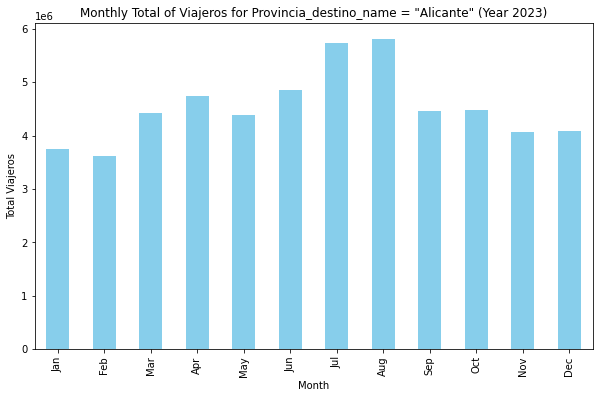

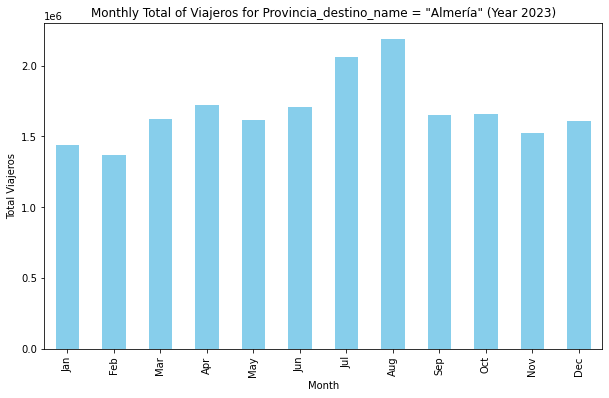

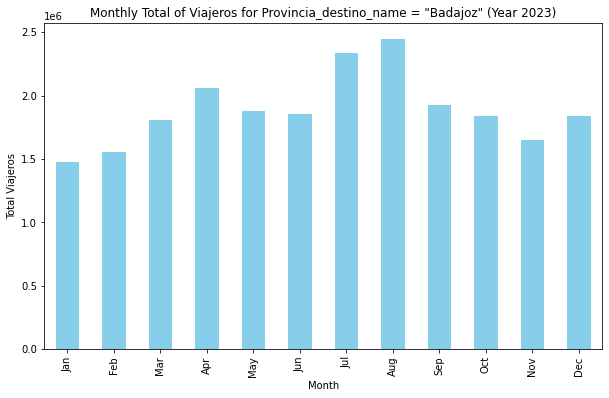

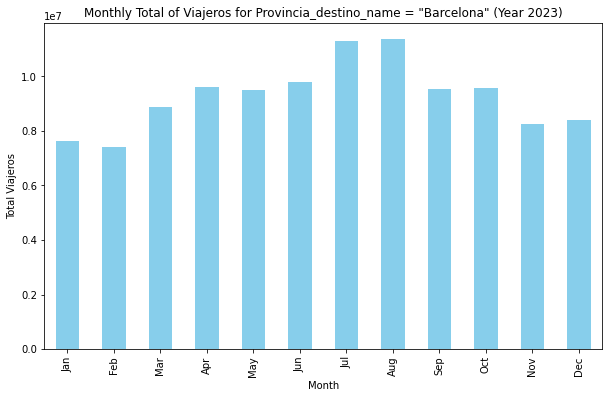

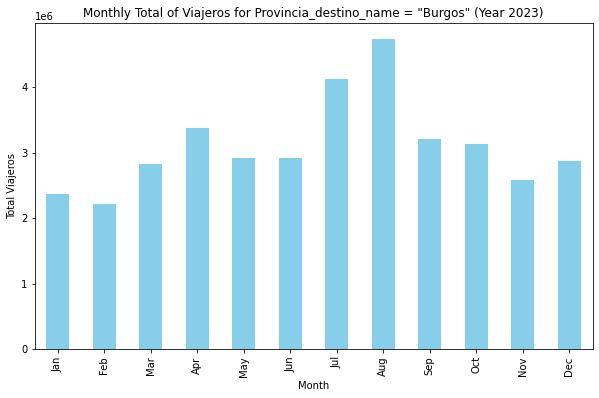

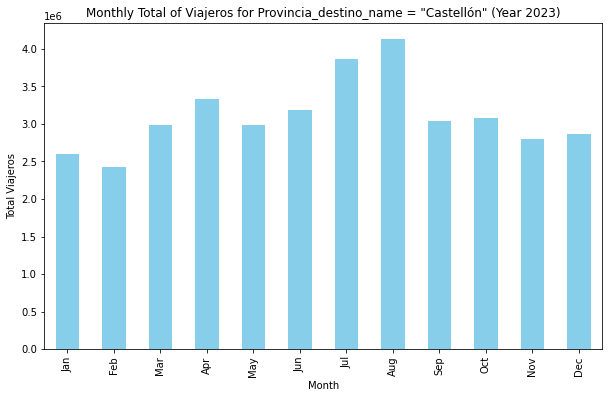

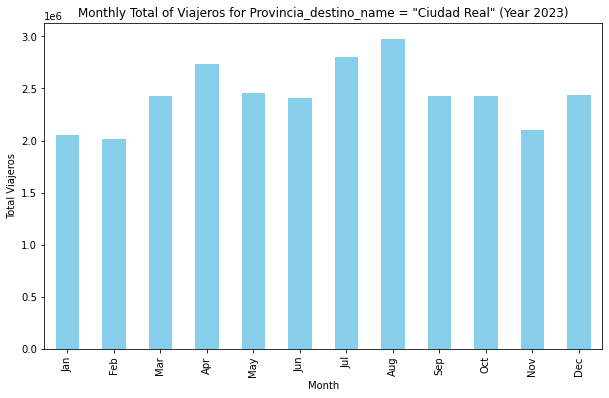

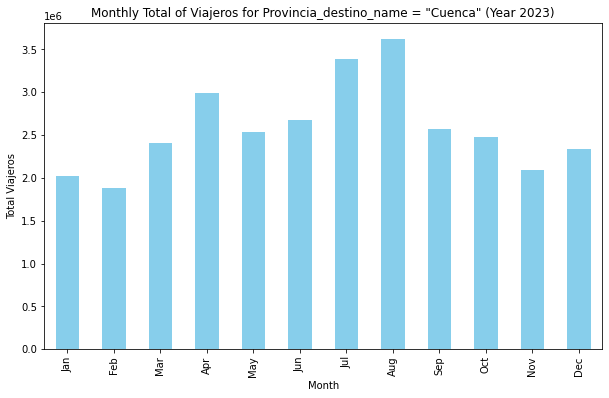

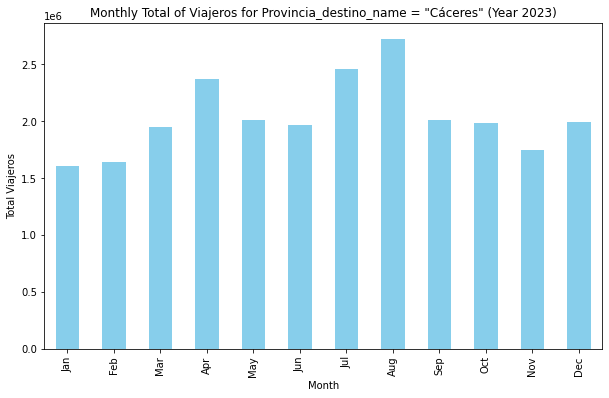

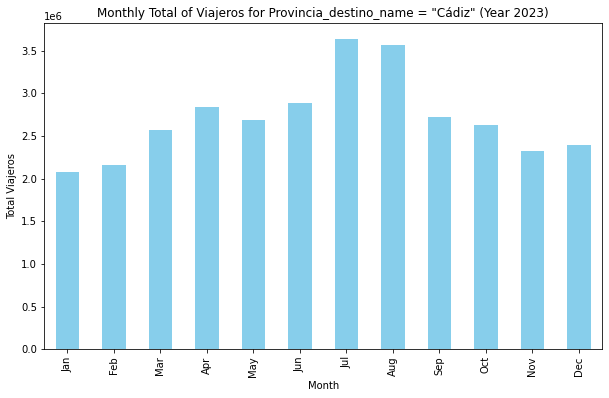

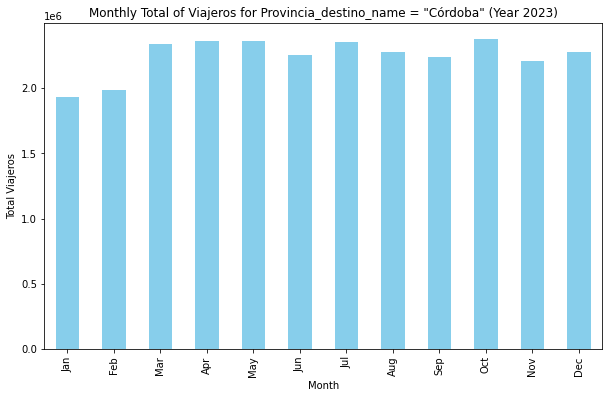

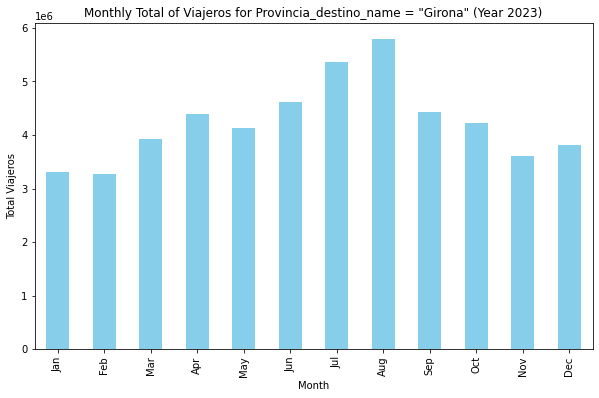

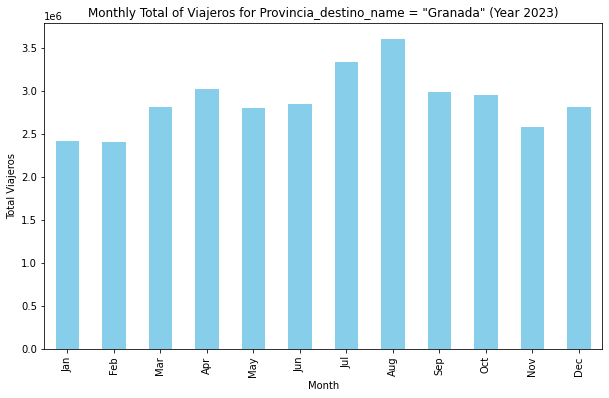

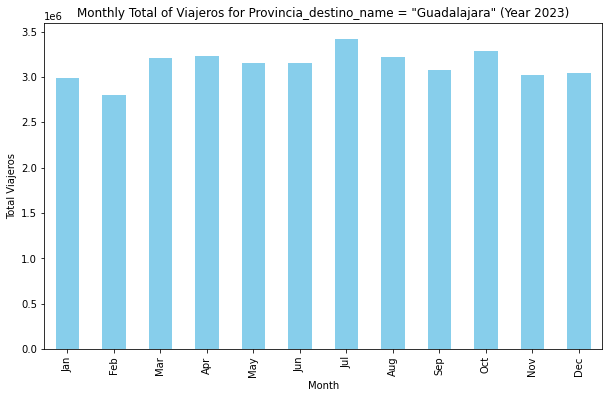

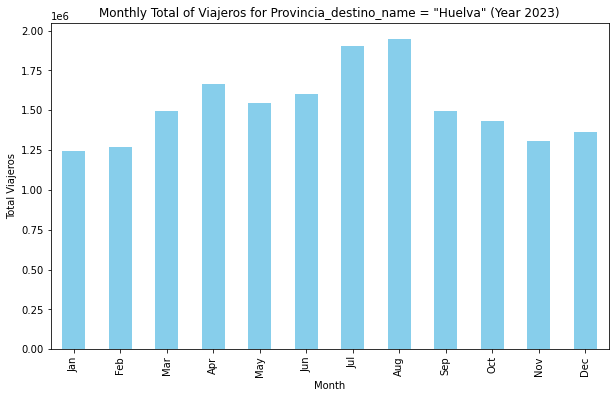

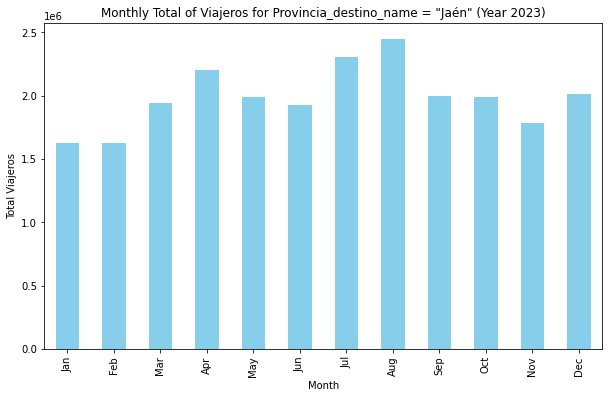

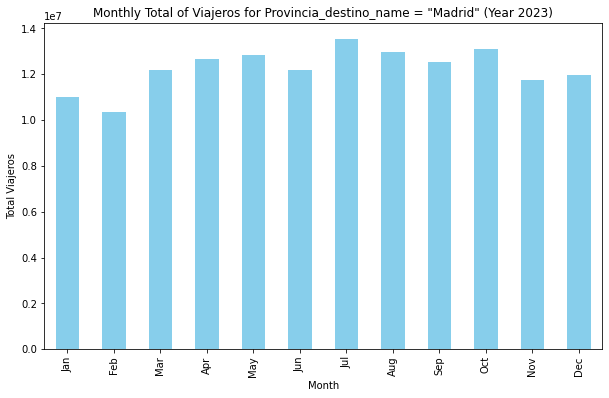

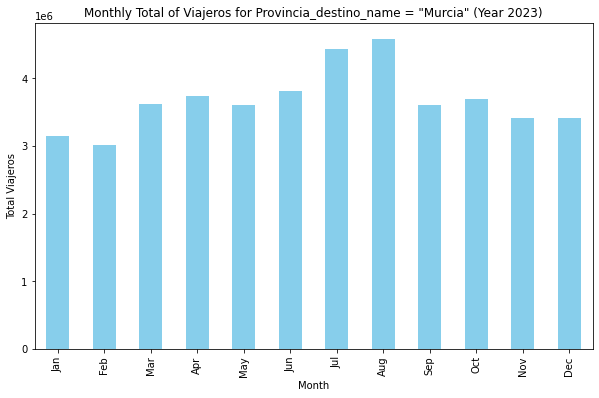

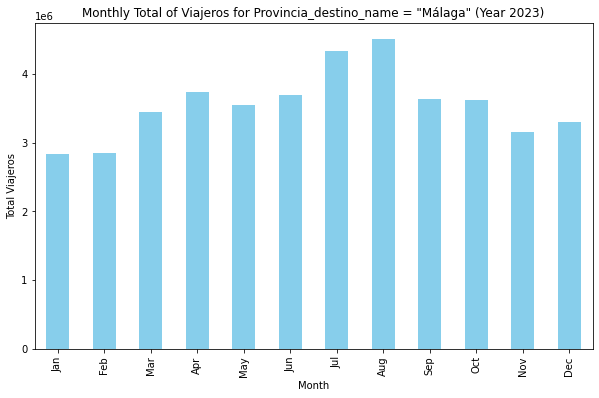

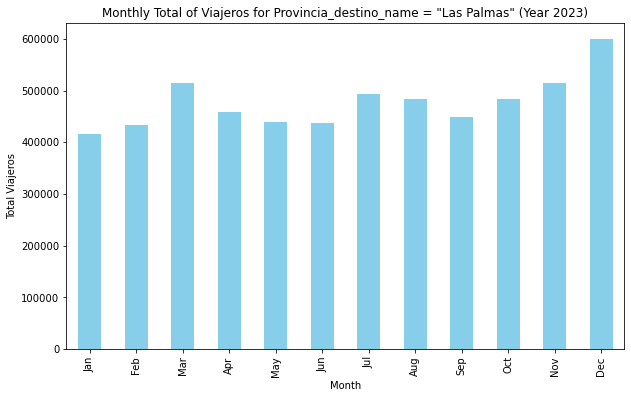

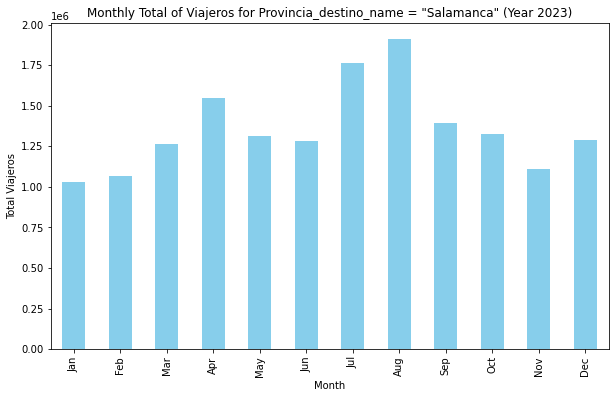

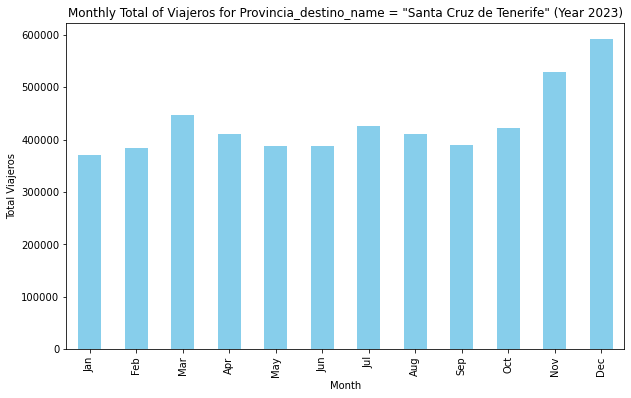

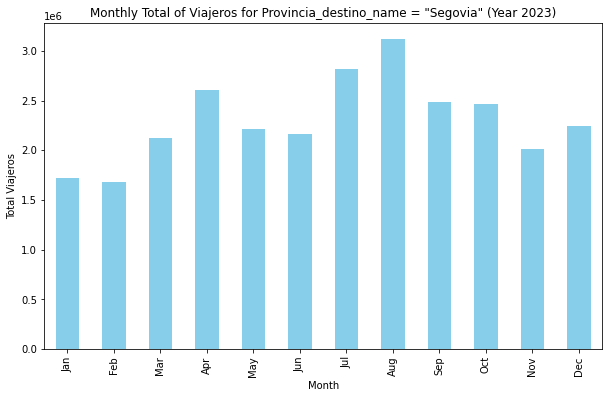

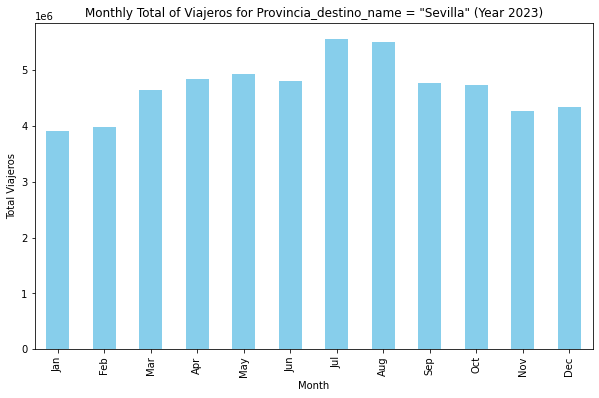

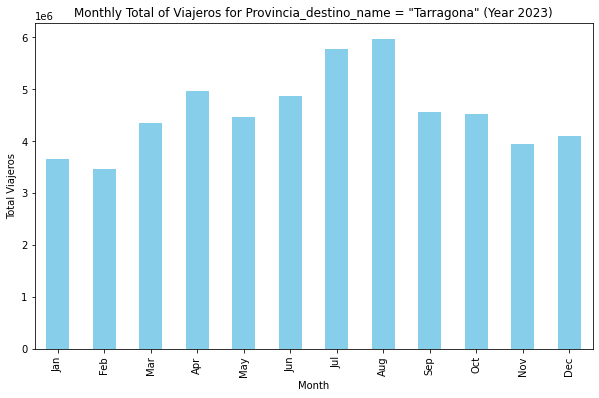

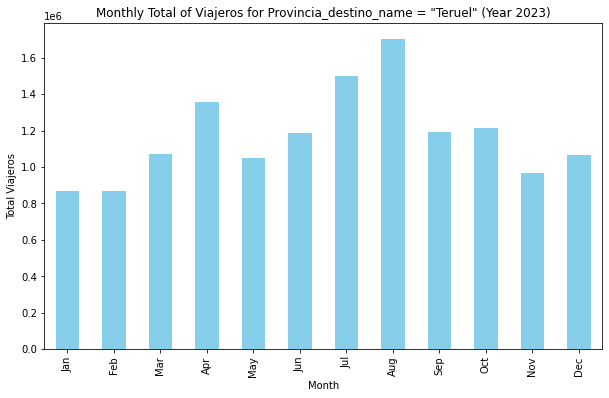

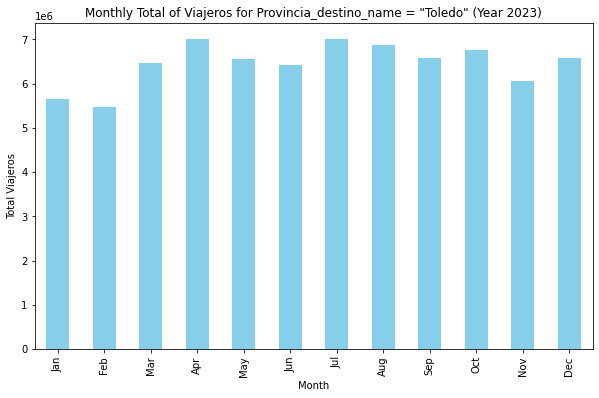

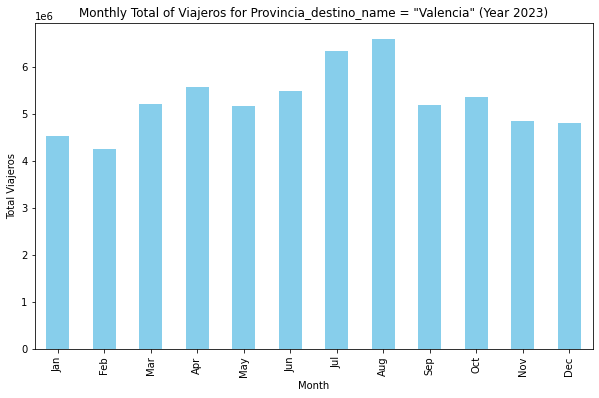

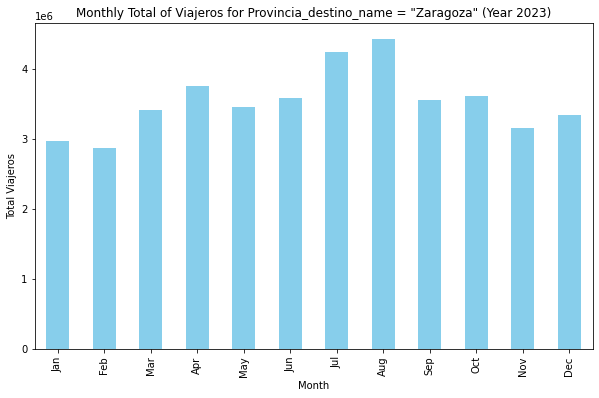

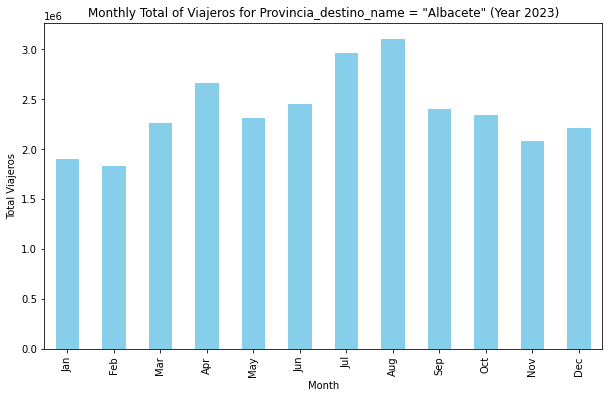

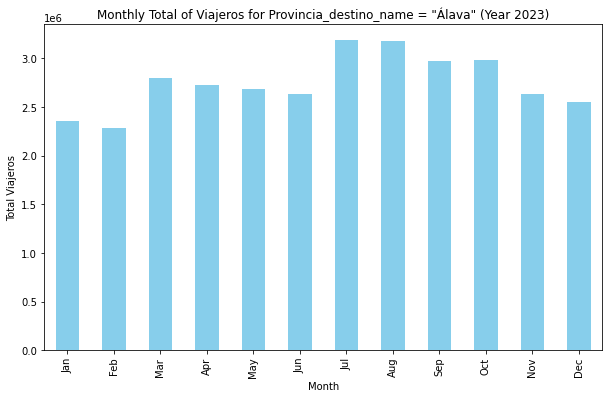

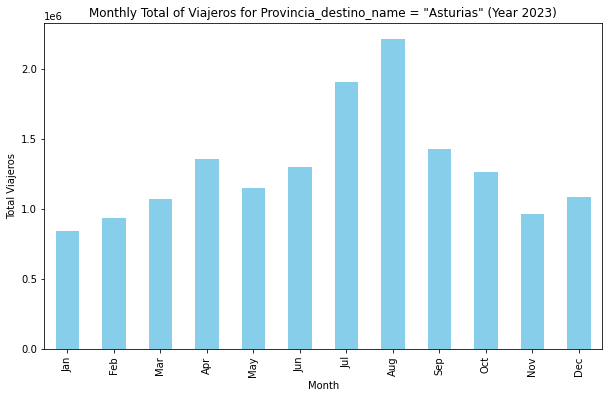

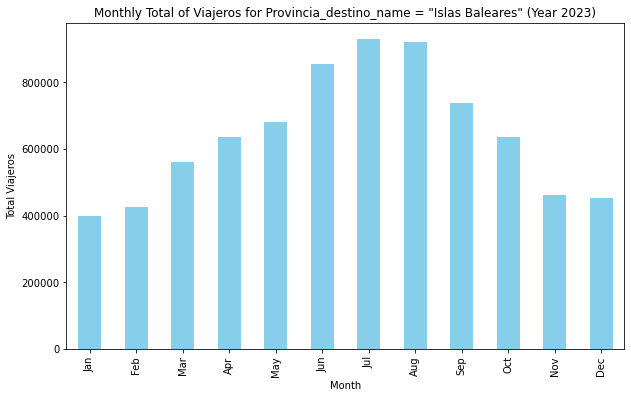

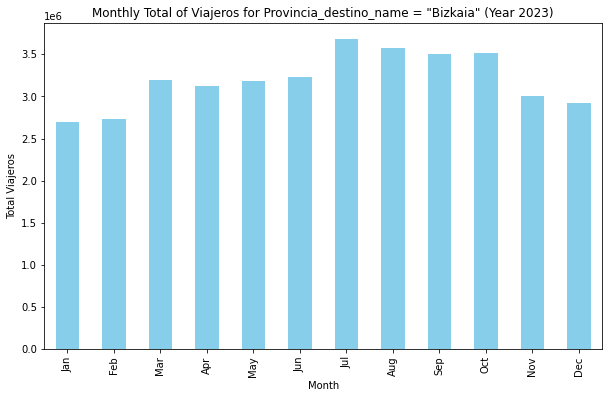

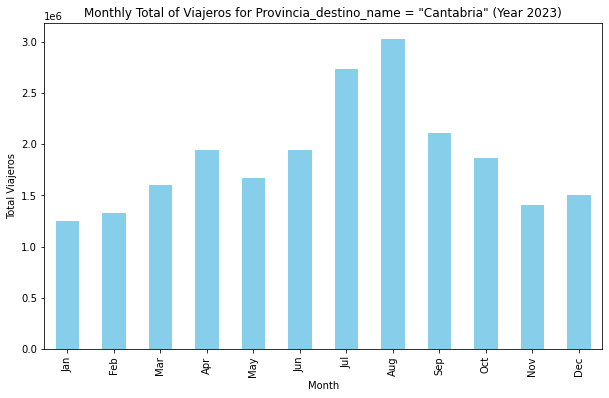

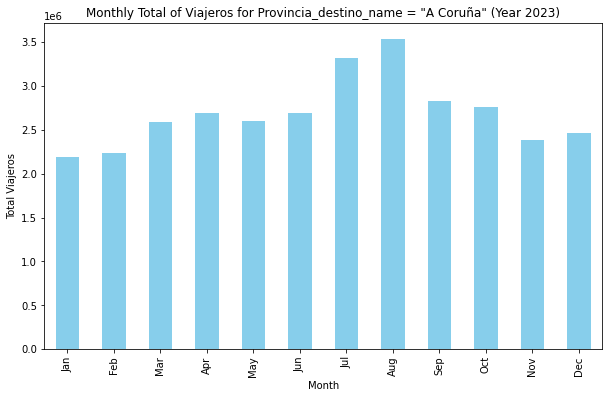

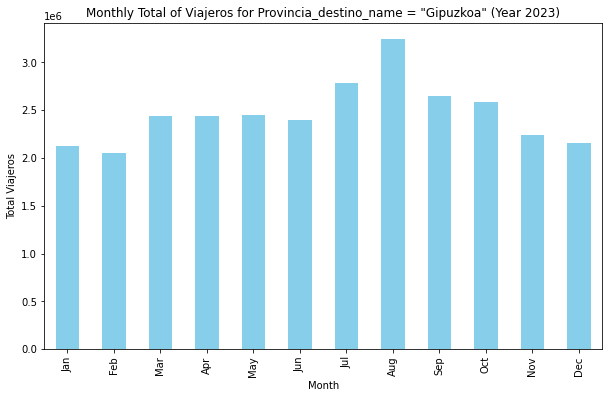

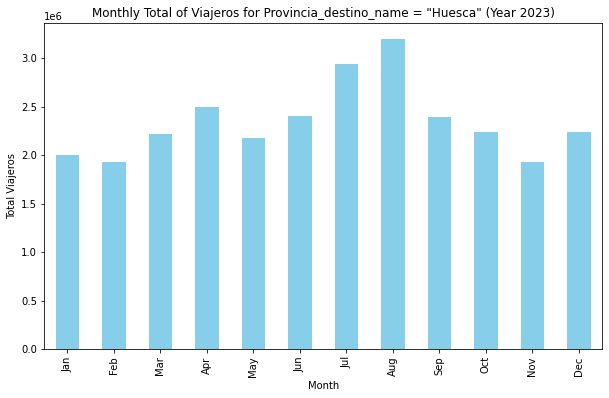

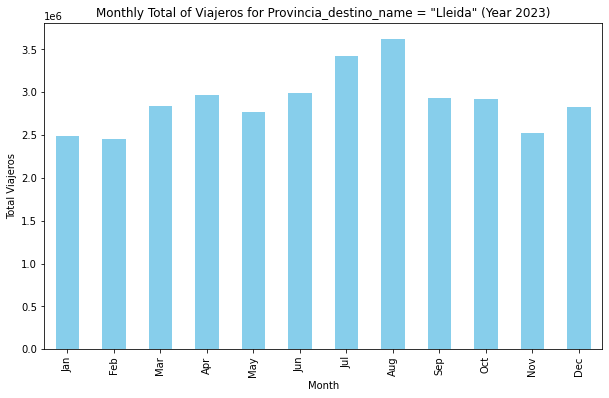

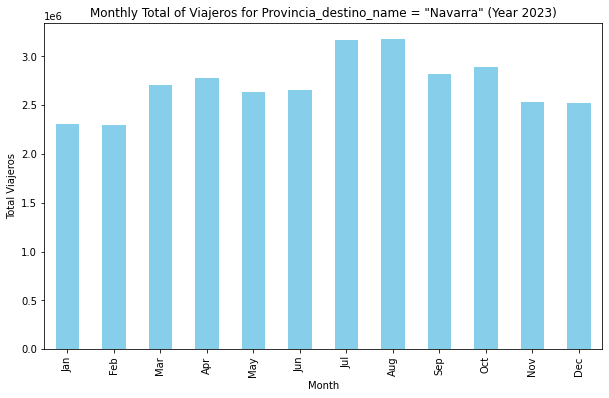

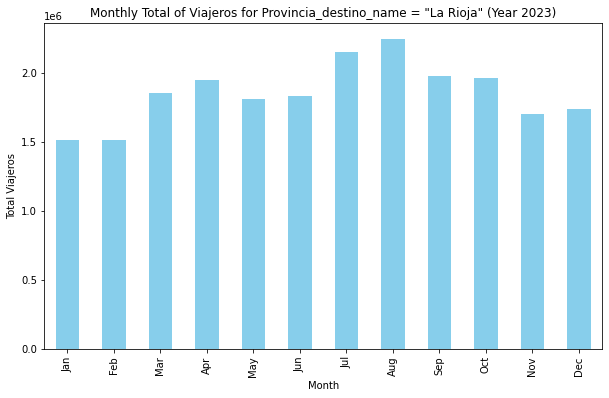

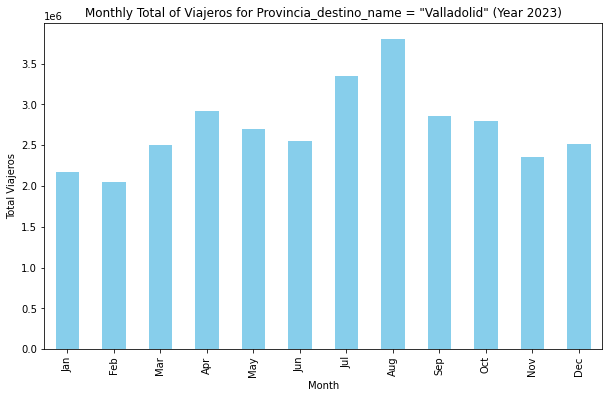

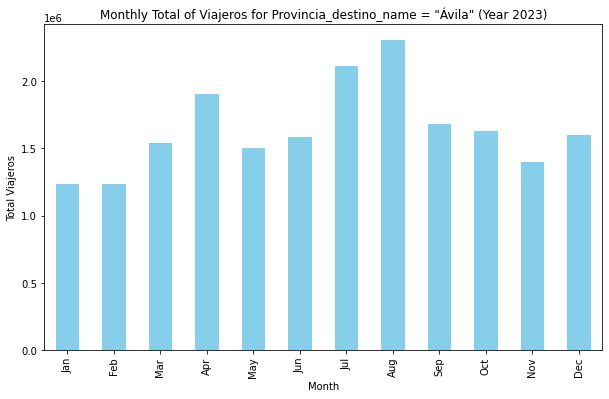

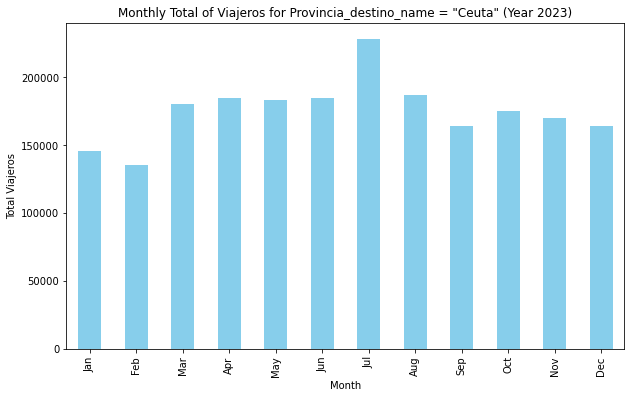

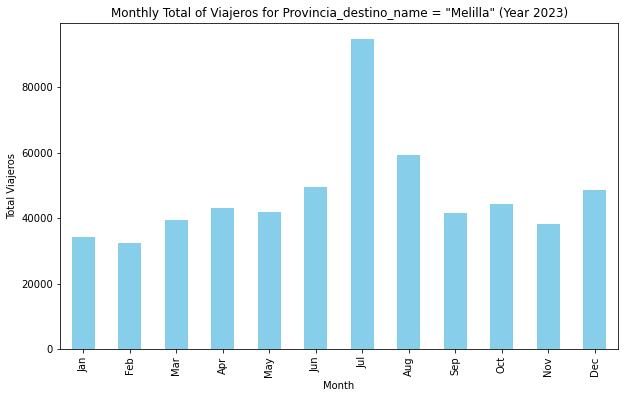

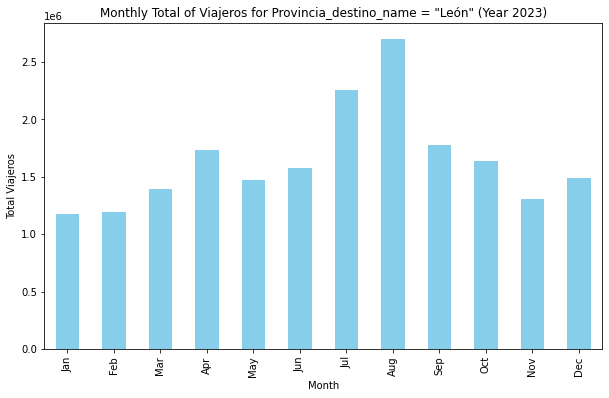

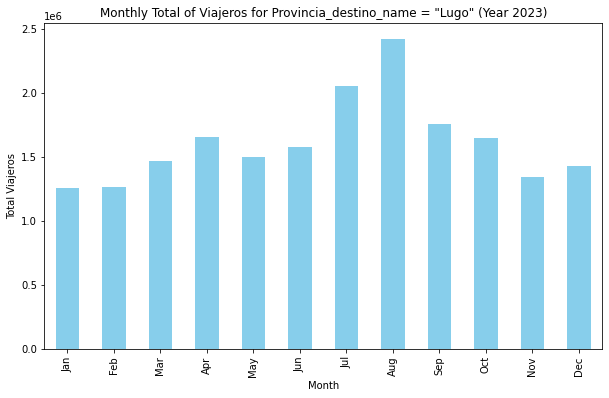

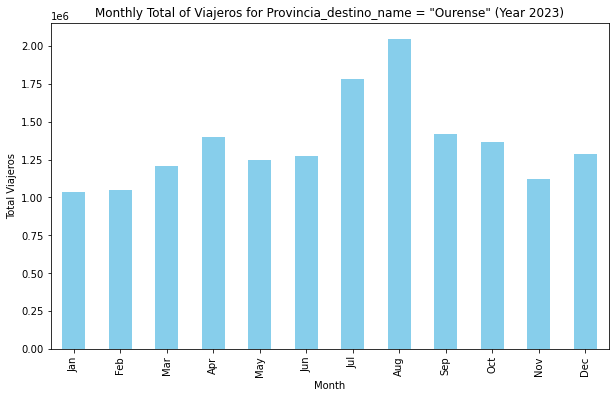

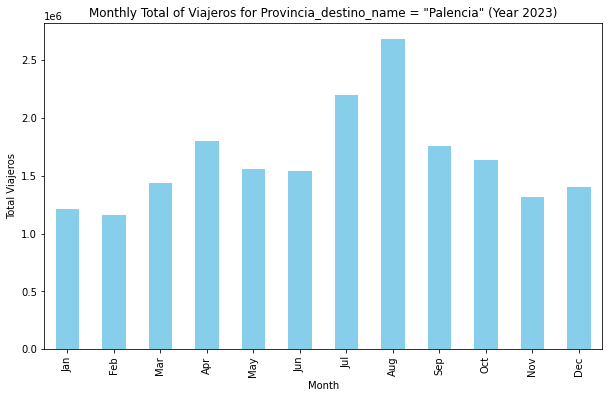

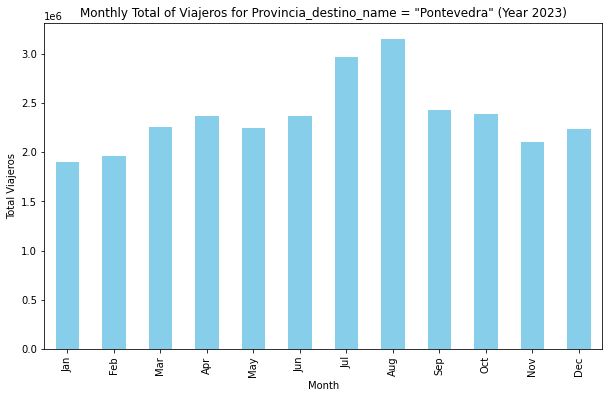

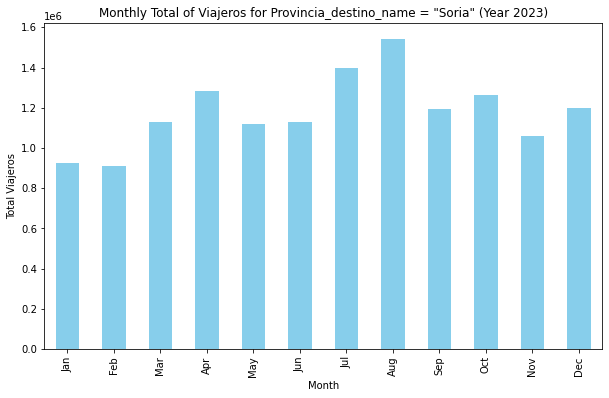

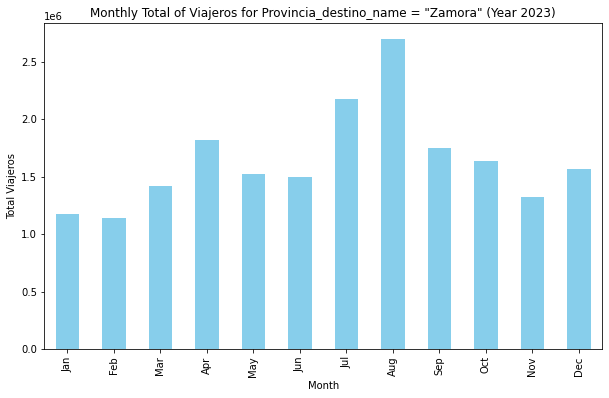

In [16]:
#CON DESTINO EN ESTAS PROVINCIAS

# Filter the DataFrame for entries from the year 2023
df_2023 = df[df['day'].dt.year == 2023]

# Get unique provinces from 'provincia_destino_name'
unique_provinces = df_2023['provincia_destino_name'].unique()

# Loop through each province and create a histogram for the year 2023
for province in unique_provinces:
    # Filter for the current province within the 2023 dataset
    filtered_df = df_2023[df_2023['provincia_destino_name'] == province]
    
    # Group by month and calculate the sum of 'viajeros' for each month
    monthly_totals = filtered_df.groupby(filtered_df['day'].dt.month)['viajeros'].sum()
    
    # Plot the histogram
    plt.figure(figsize=(10, 6))
    monthly_totals.plot(kind='bar', color='skyblue')
    plt.xlabel('Month')
    plt.ylabel('Total Viajeros')
    plt.title(f'Monthly Total of Viajeros for Provincia_destino_name = "{province}" (Year 2023)')
    plt.xticks(ticks=range(0, 12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
    plt.show()


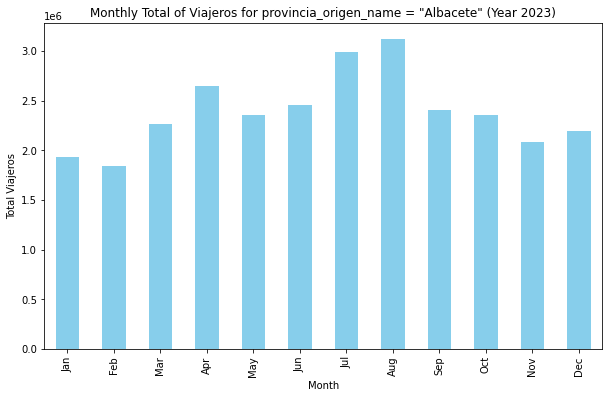

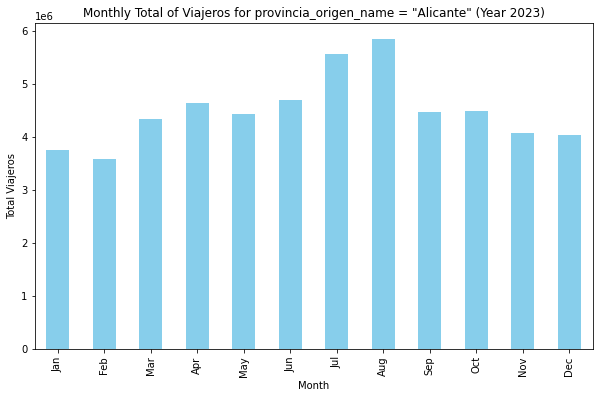

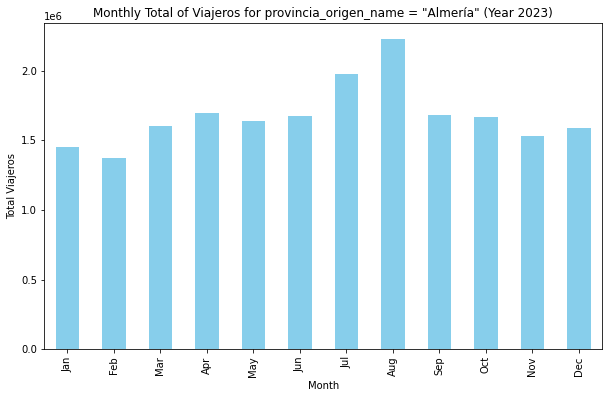

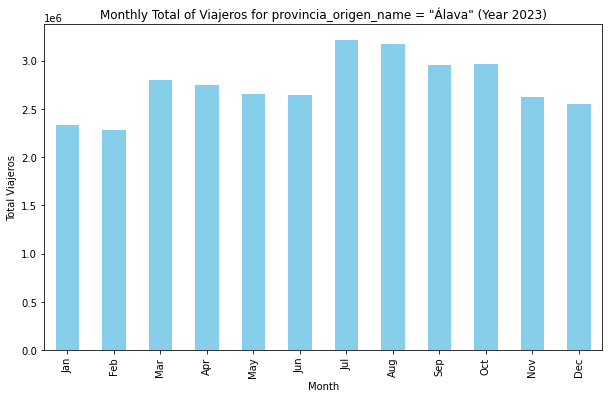

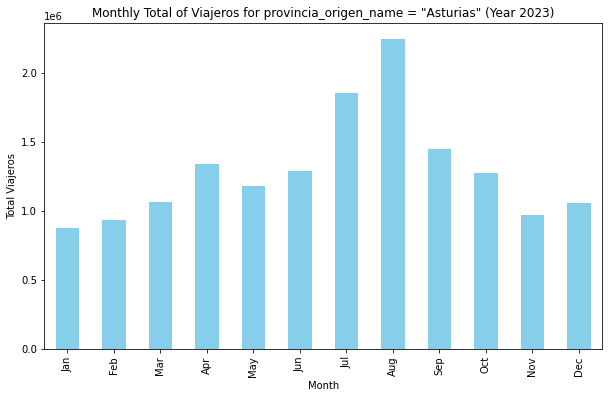

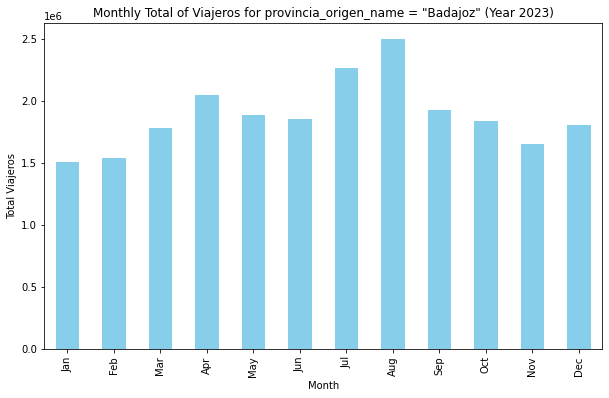

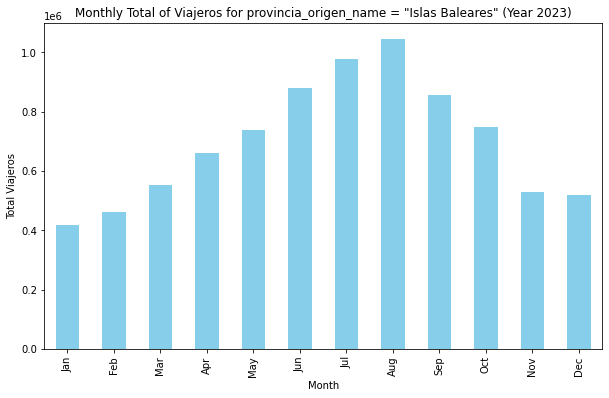

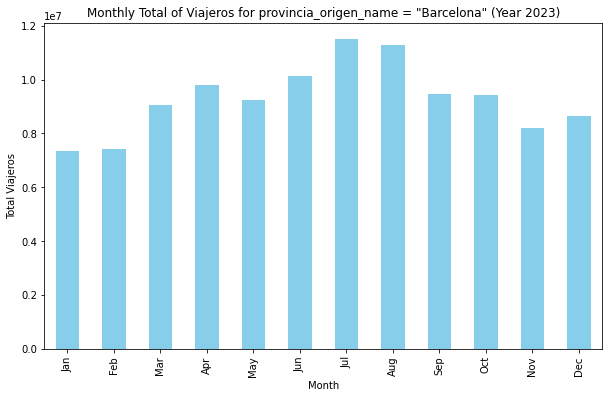

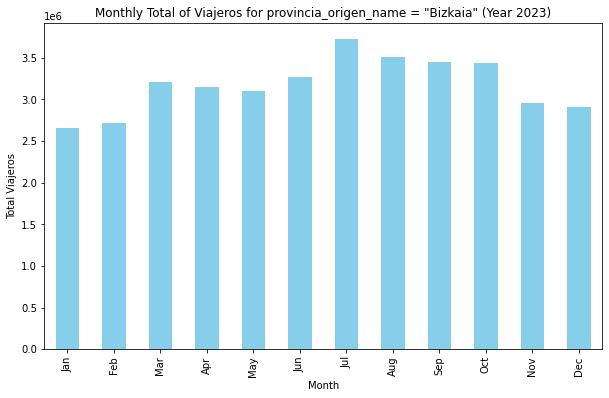

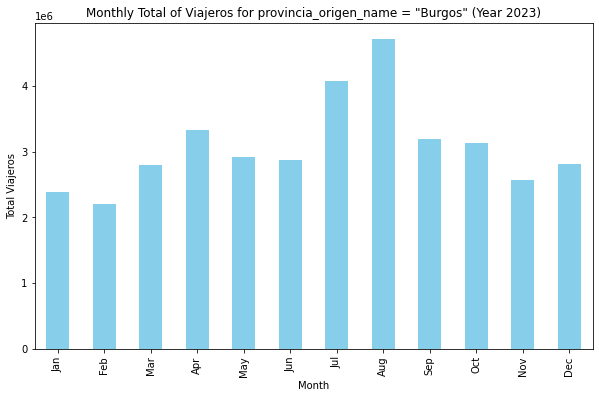

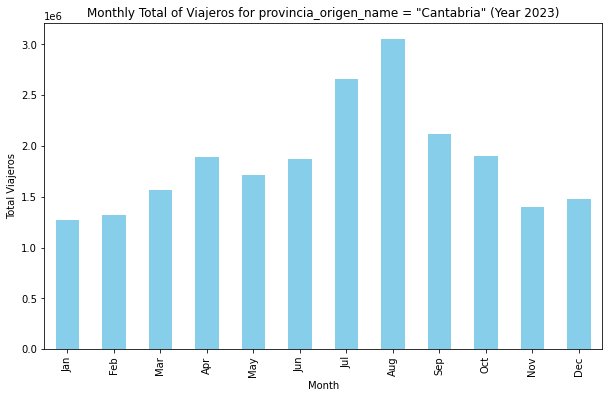

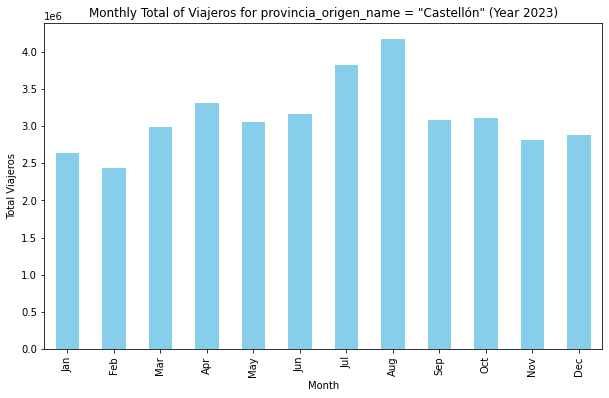

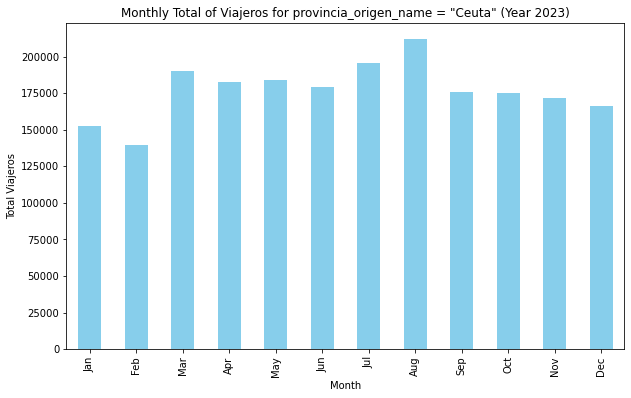

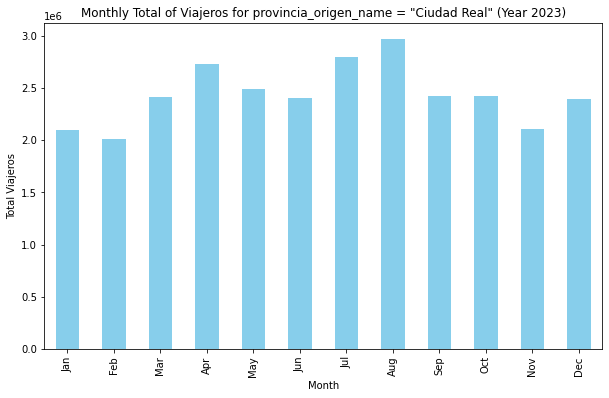

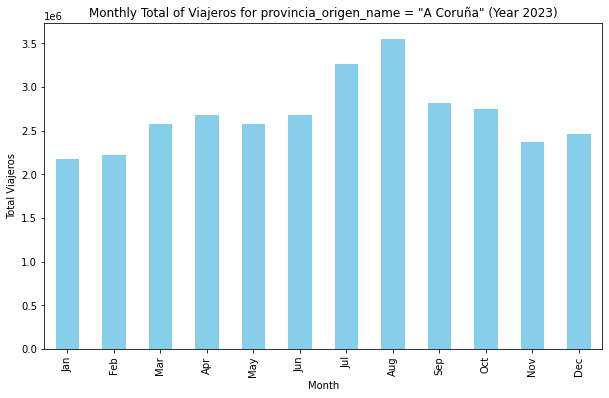

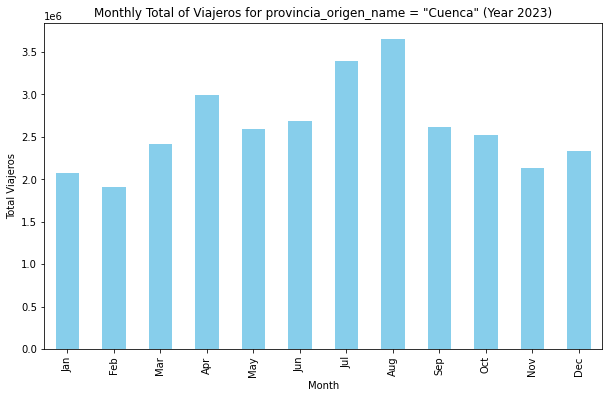

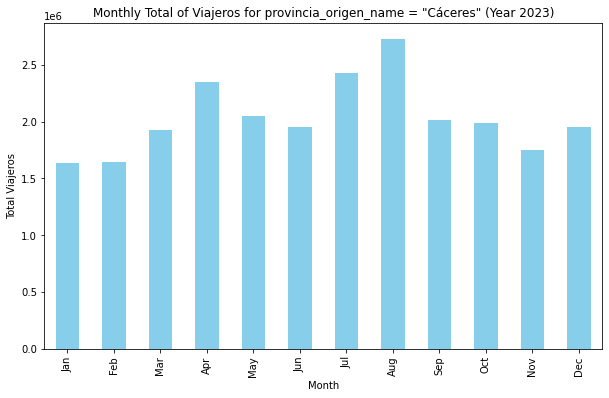

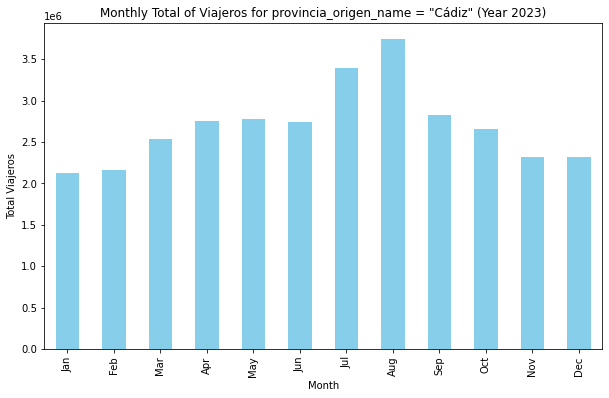

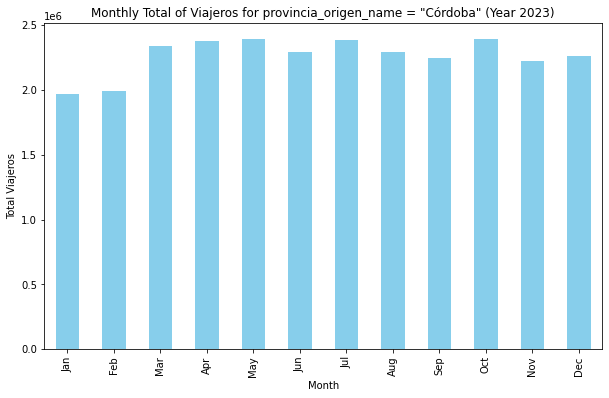

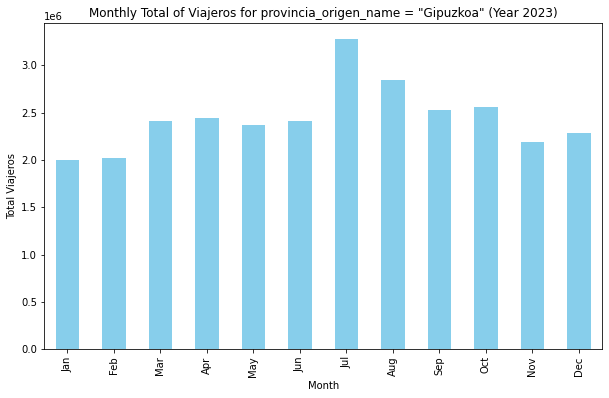

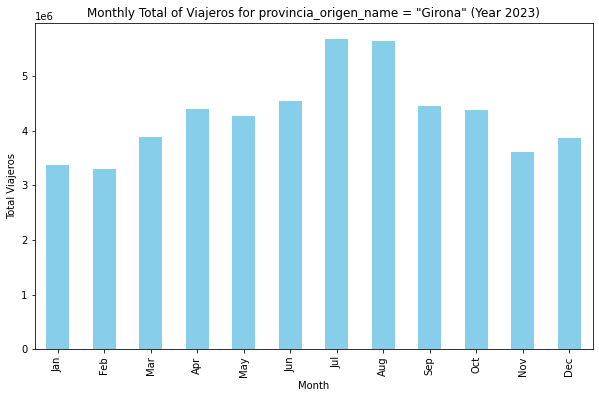

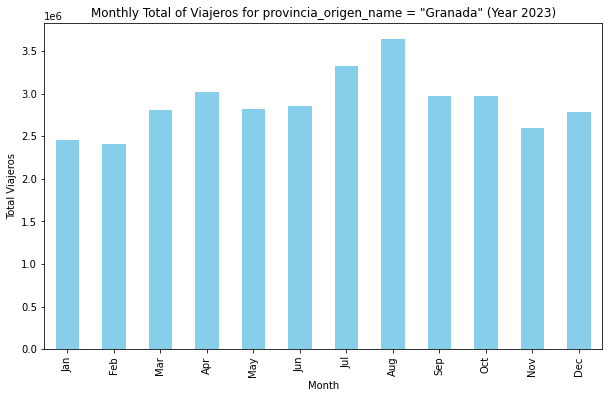

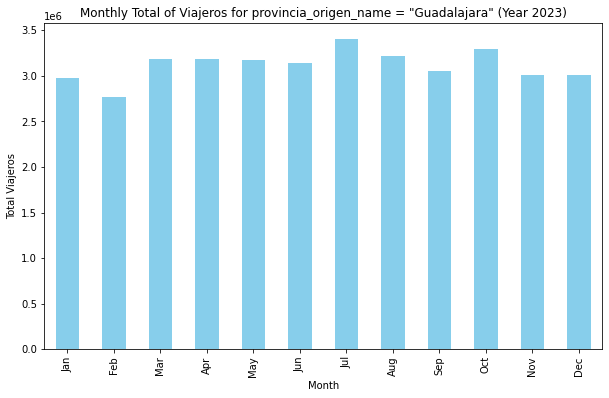

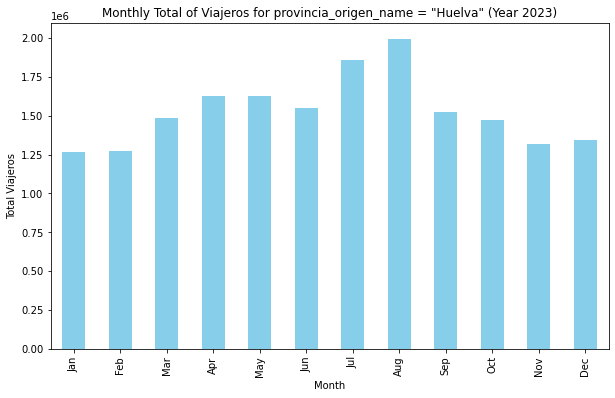

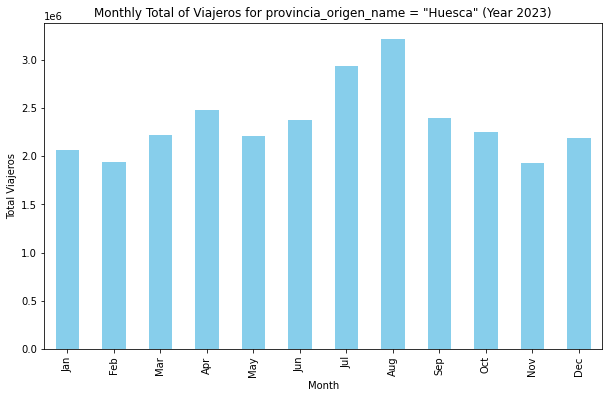

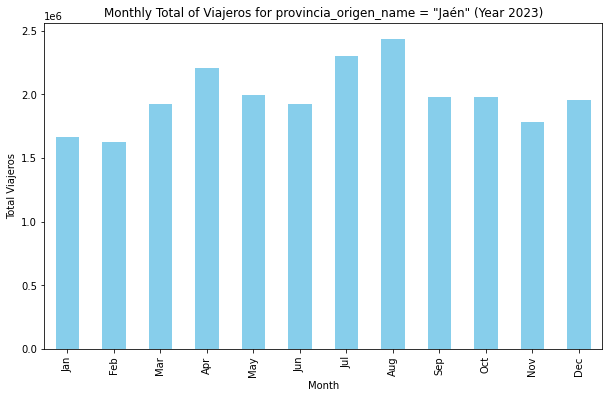

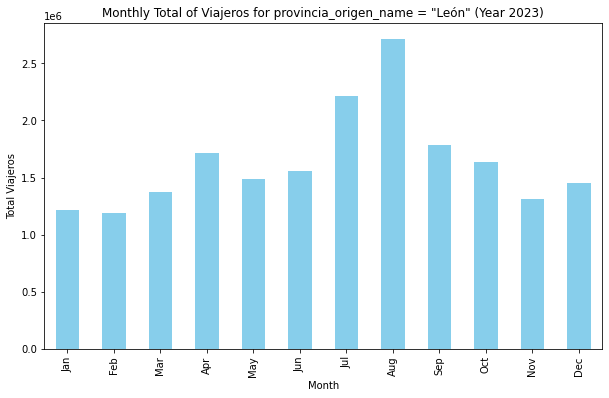

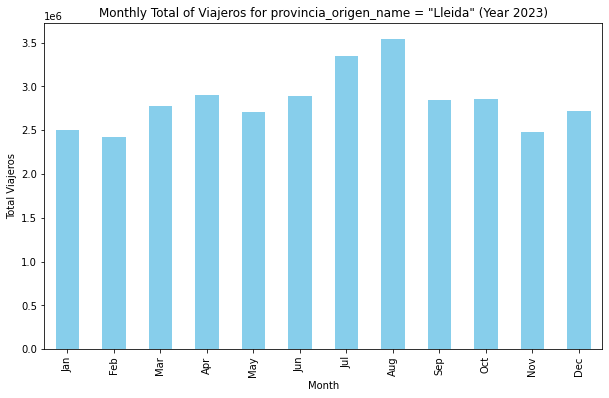

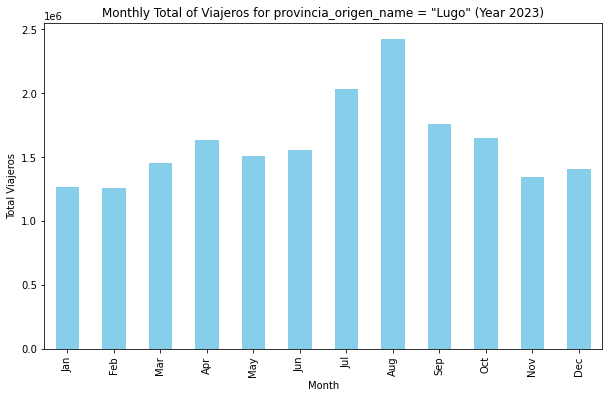

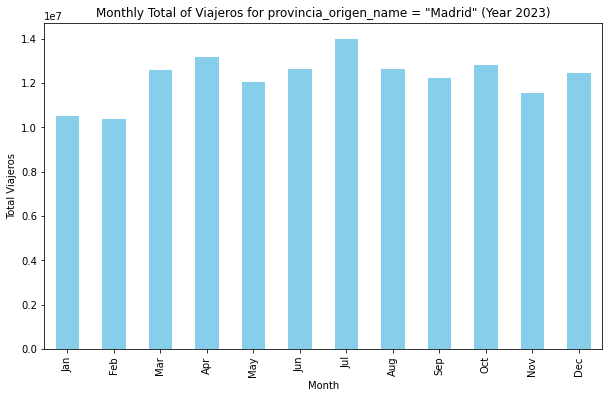

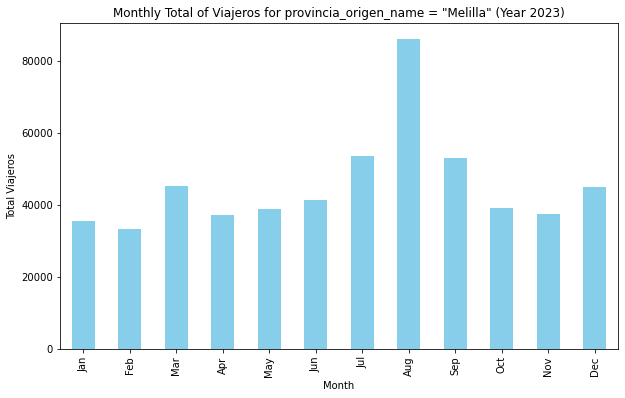

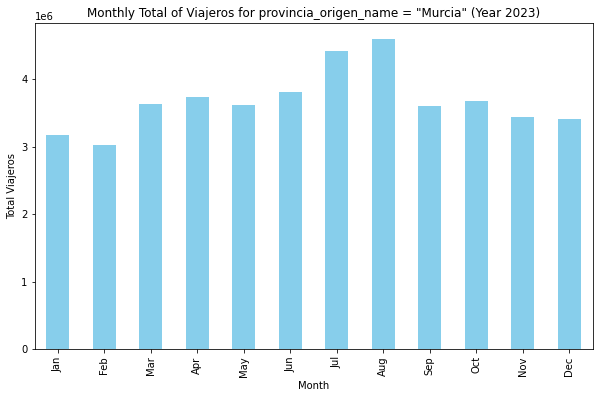

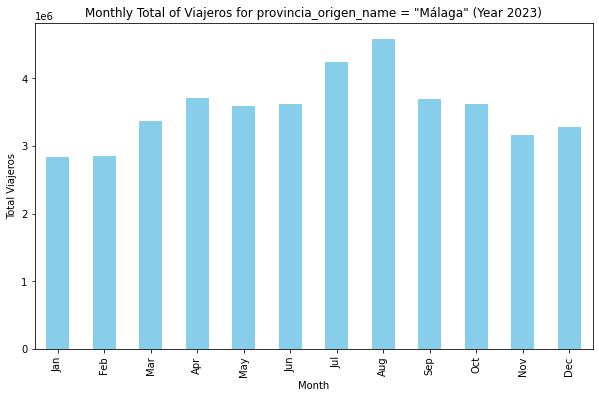

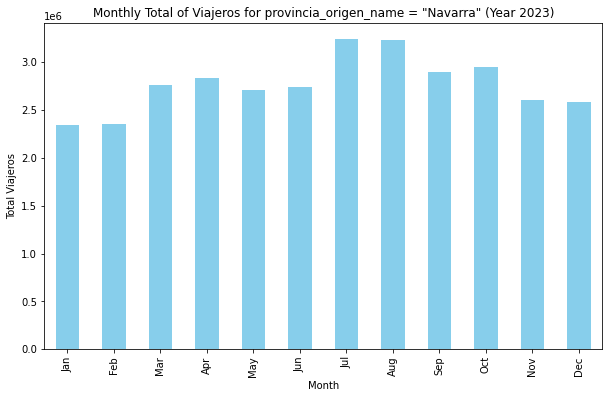

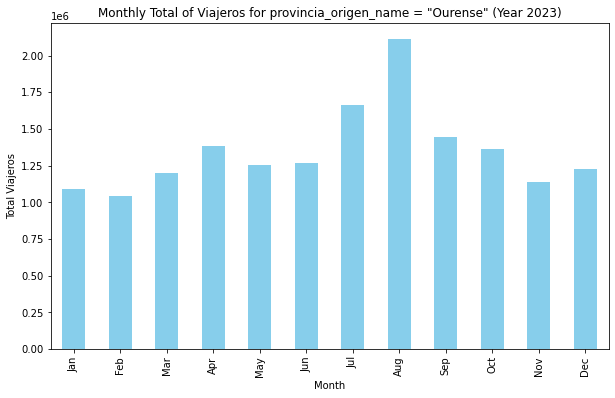

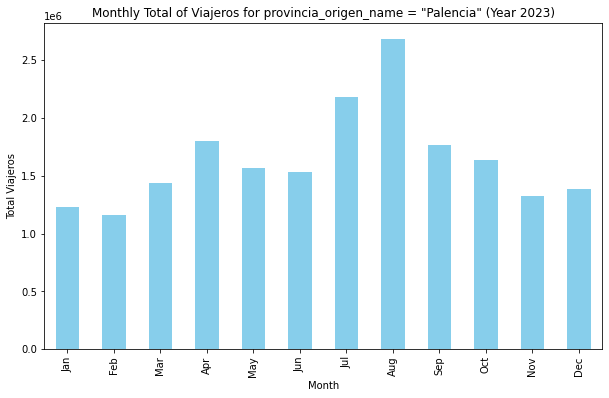

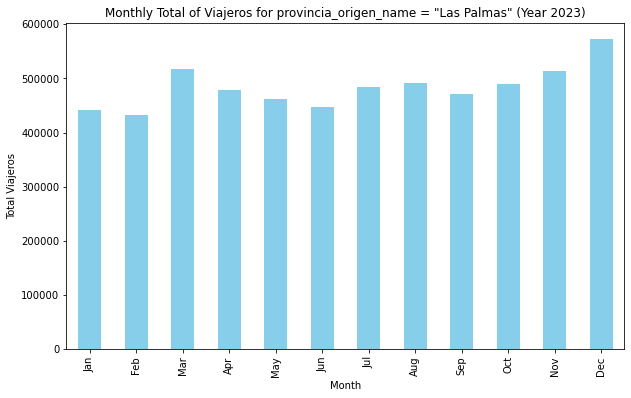

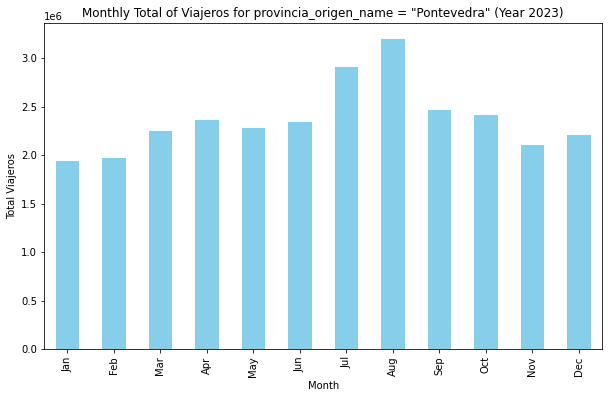

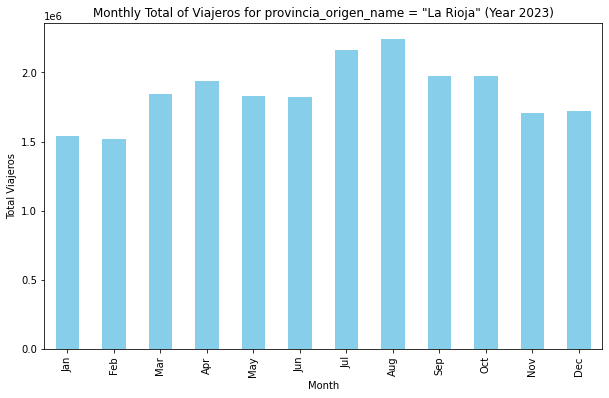

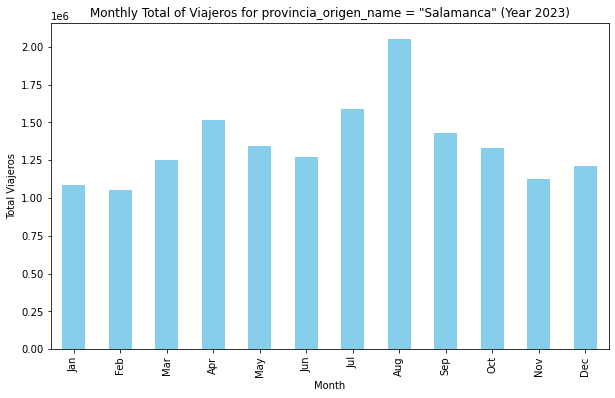

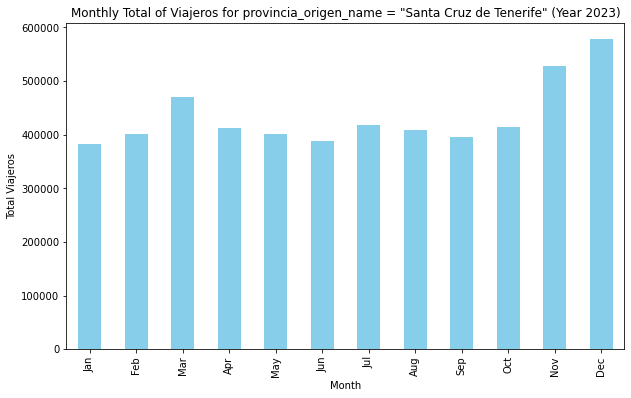

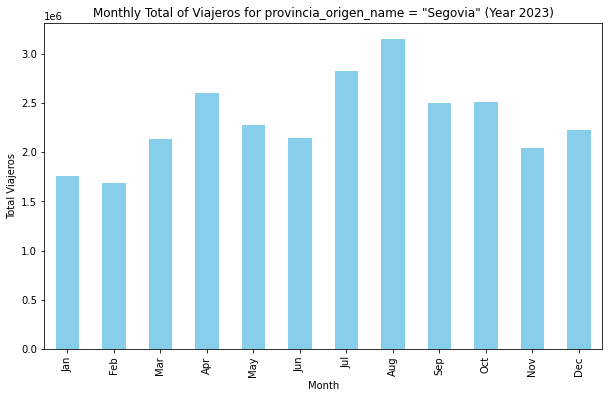

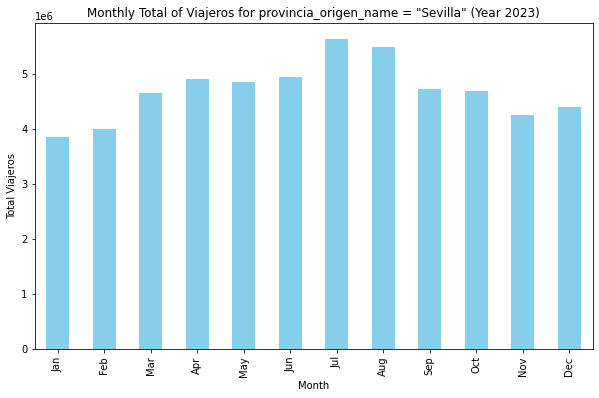

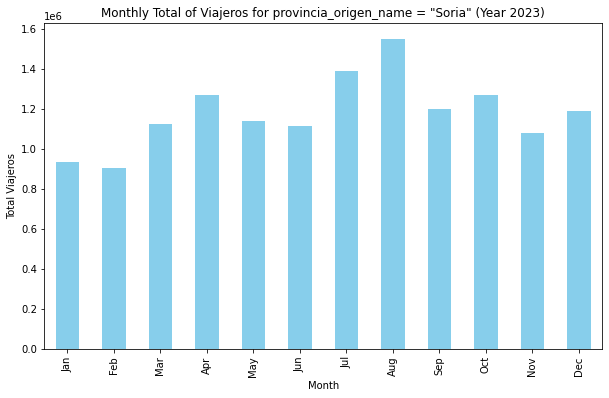

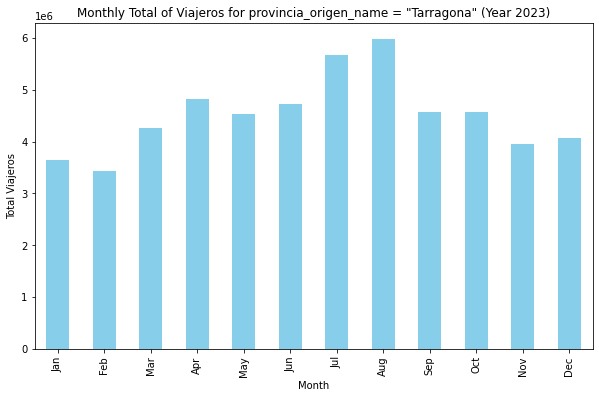

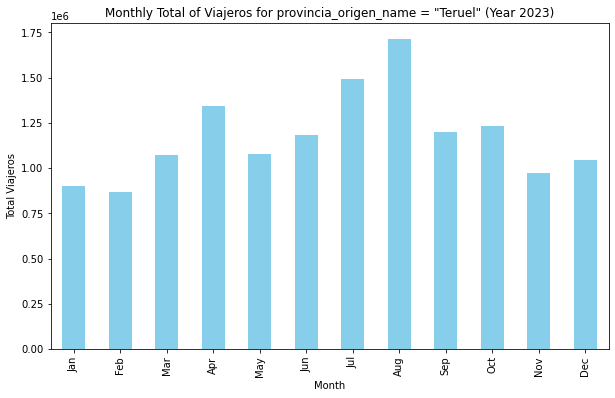

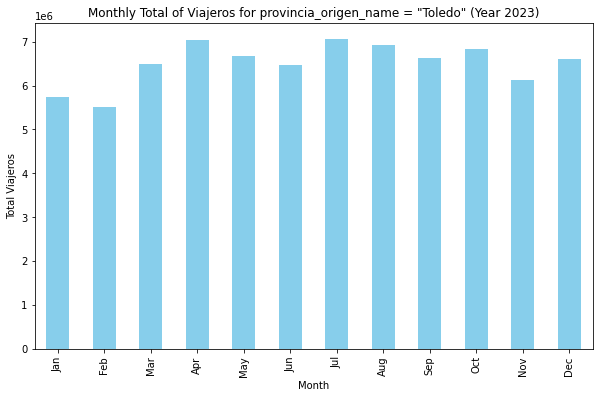

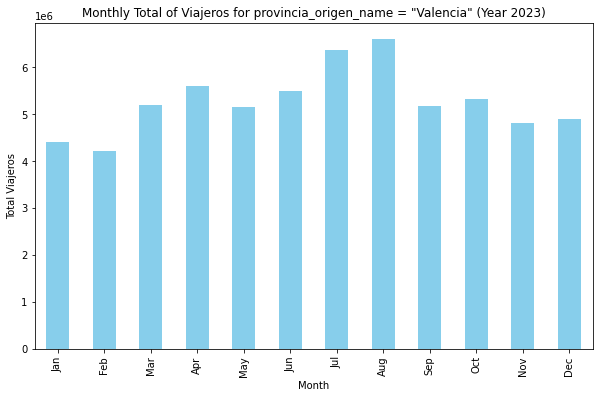

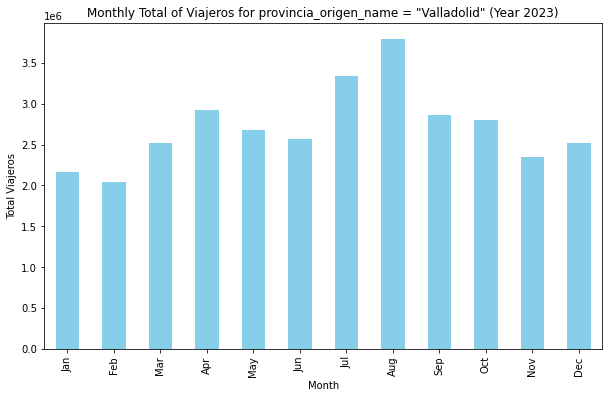

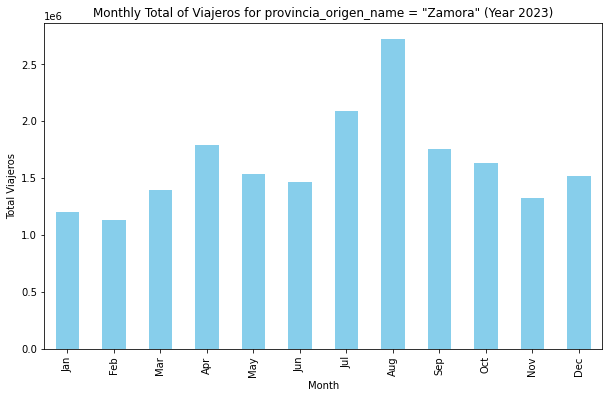

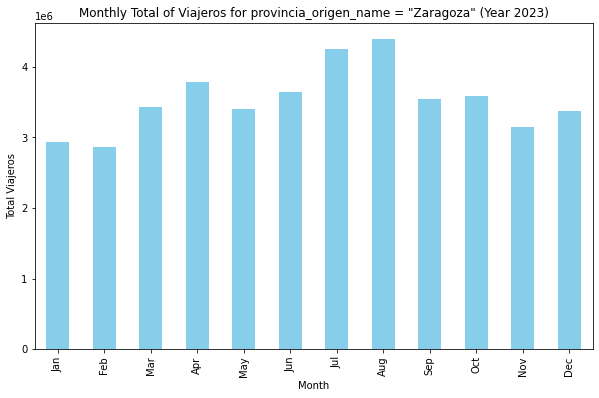

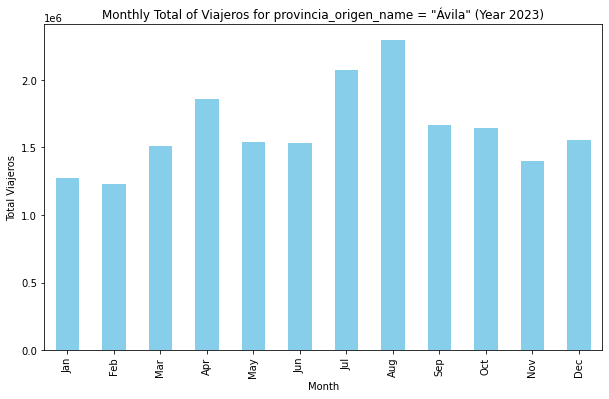

In [17]:
#CON ORIGEN EN ESTAS PROVINCIAS

# Filter the DataFrame for entries from the year 2023
df_2023 = df[df['day'].dt.year == 2023]

# Get unique provinces from 'provincia_destino_name'
unique_provinces = df_2023['provincia_origen_name'].unique()

# Loop through each province and create a histogram for the year 2023
for province in unique_provinces:
    # Filter for the current province within the 2023 dataset
    filtered_df = df_2023[df_2023['provincia_origen_name'] == province]
    
    # Group by month and calculate the sum of 'viajeros' for each month
    monthly_totals = filtered_df.groupby(filtered_df['day'].dt.month)['viajeros'].sum()
    
    # Plot the histogram
    plt.figure(figsize=(10, 6))
    monthly_totals.plot(kind='bar', color='skyblue')
    plt.xlabel('Month')
    plt.ylabel('Total Viajeros')
    plt.title(f'Monthly Total of Viajeros for provincia_origen_name = "{province}" (Year 2023)')
    plt.xticks(ticks=range(0, 12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
    plt.show()


## DAILY TOTAL TRAVELERS PER DESTINATION/ORIGIN PROVINCE IN FULL YEAR 2023

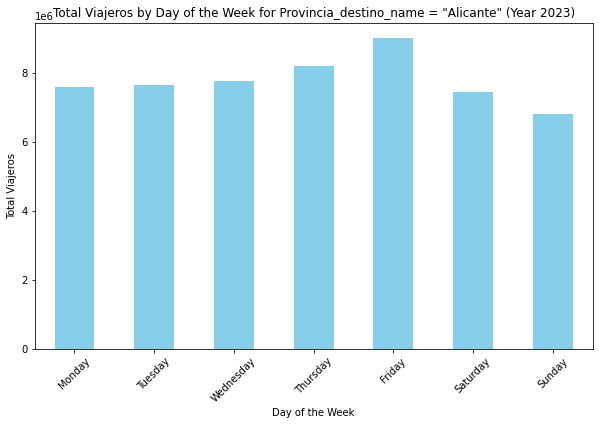

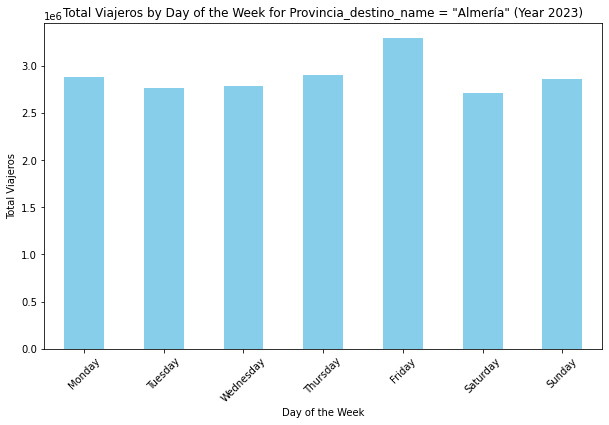

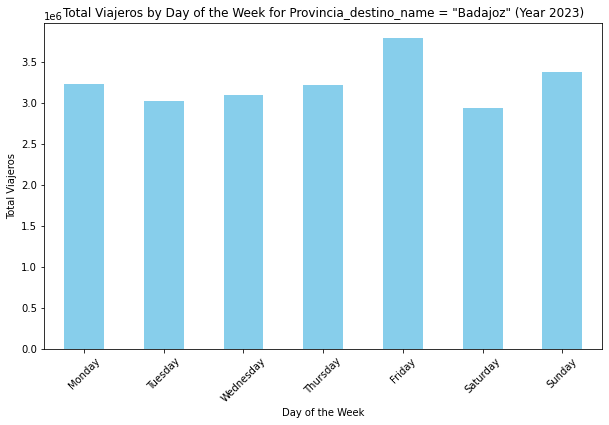

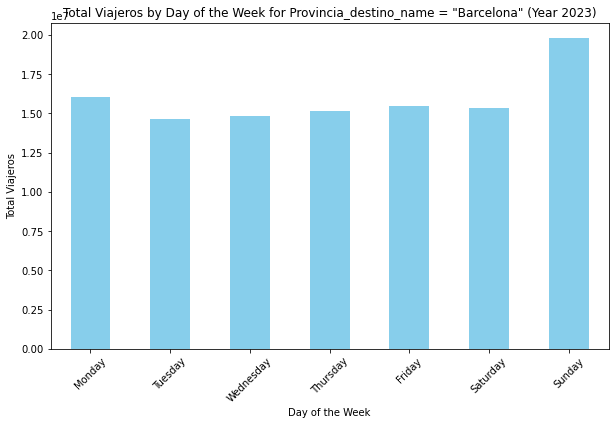

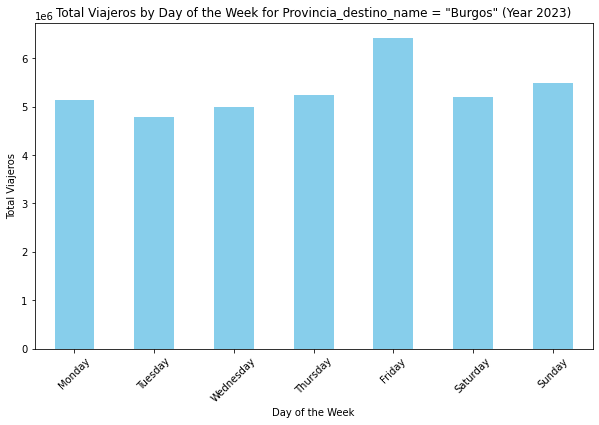

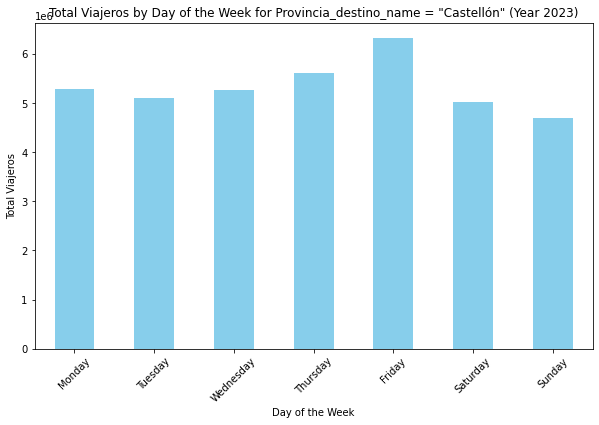

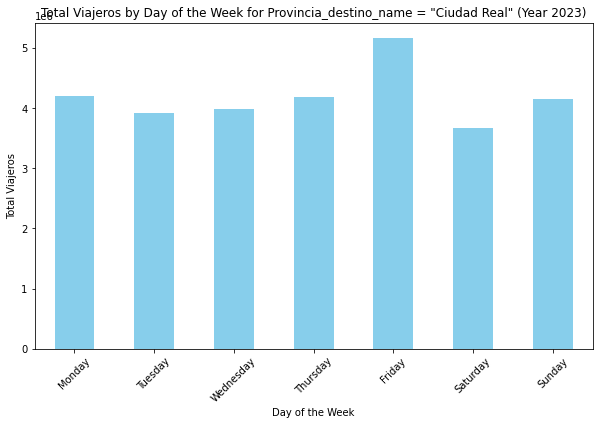

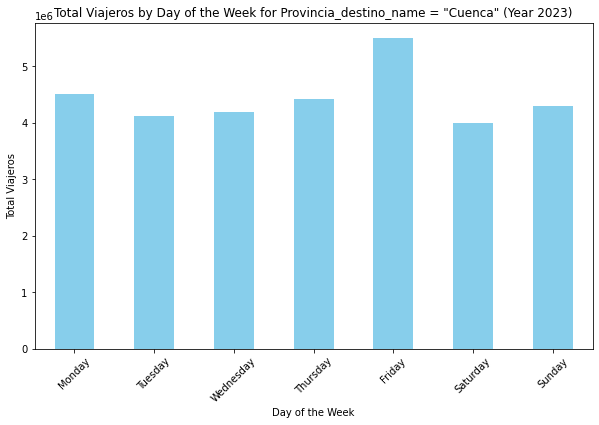

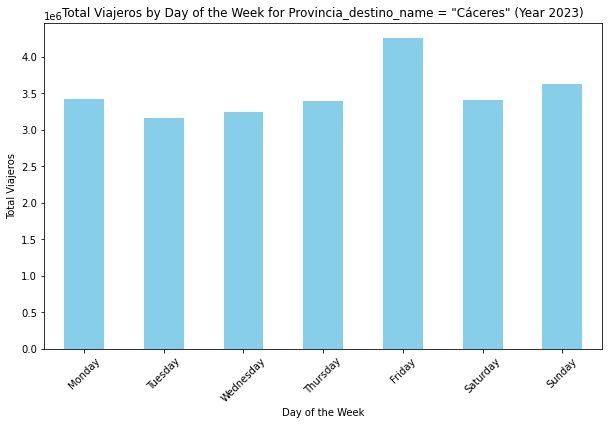

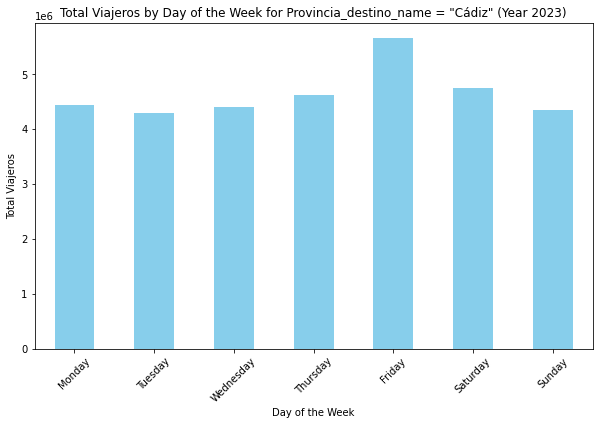

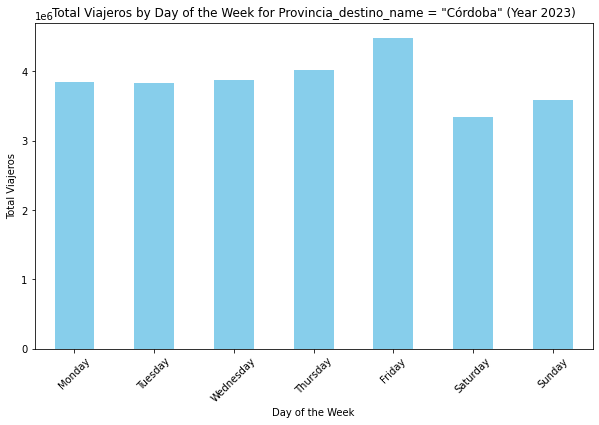

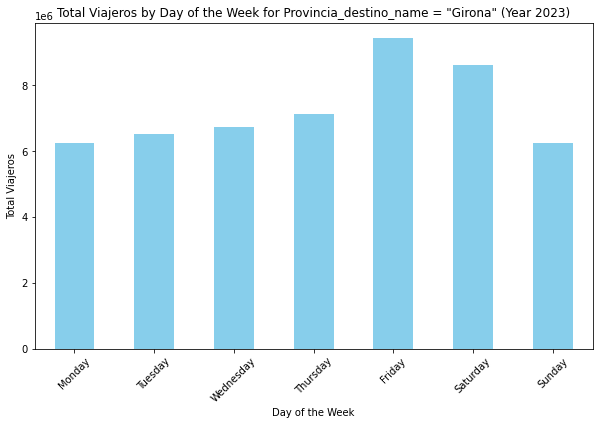

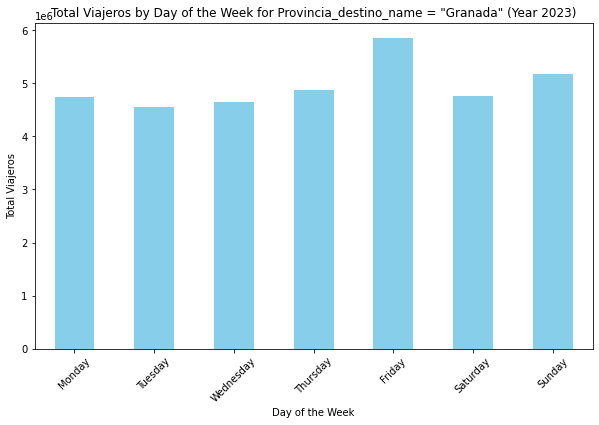

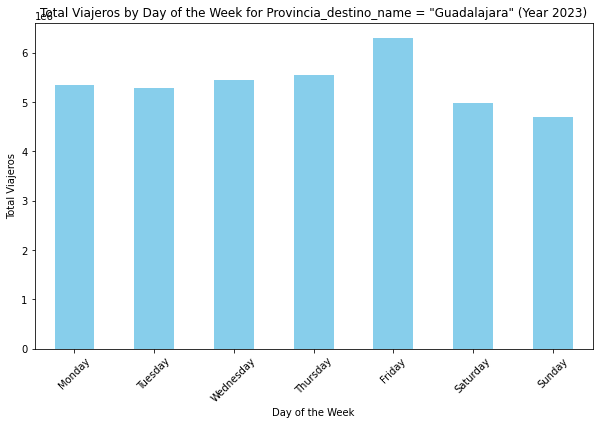

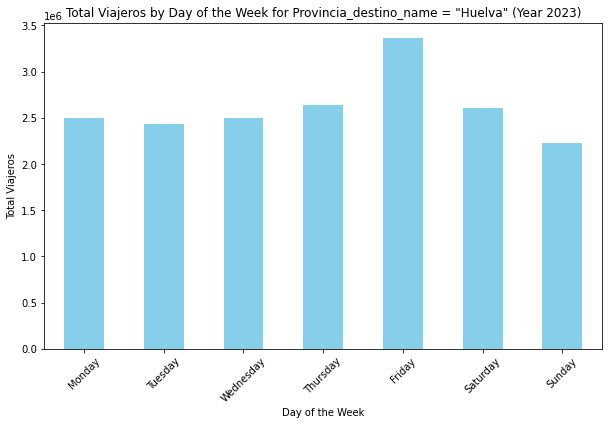

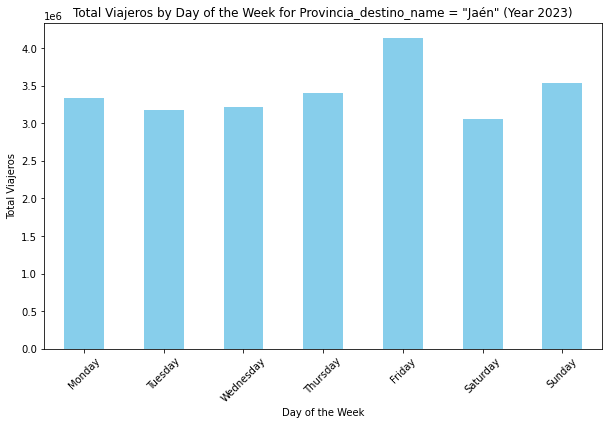

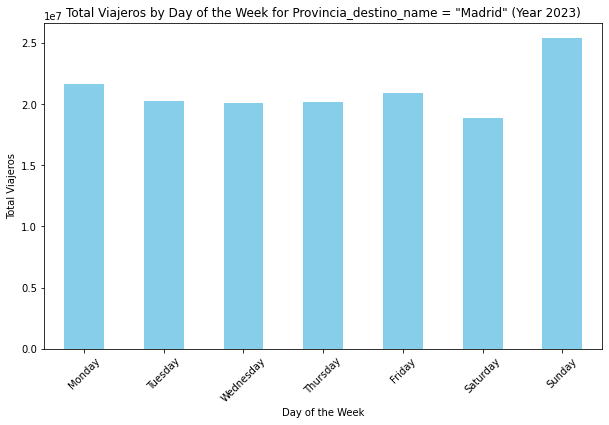

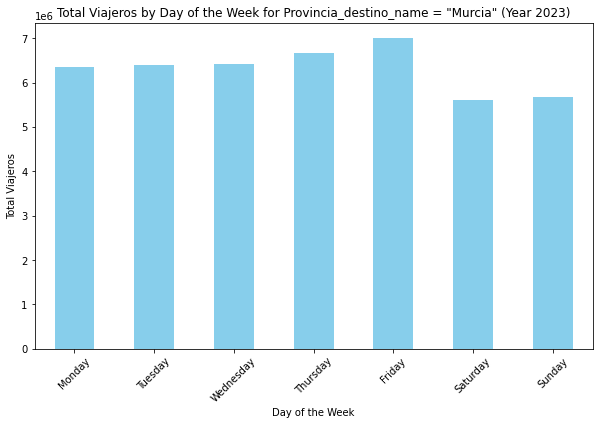

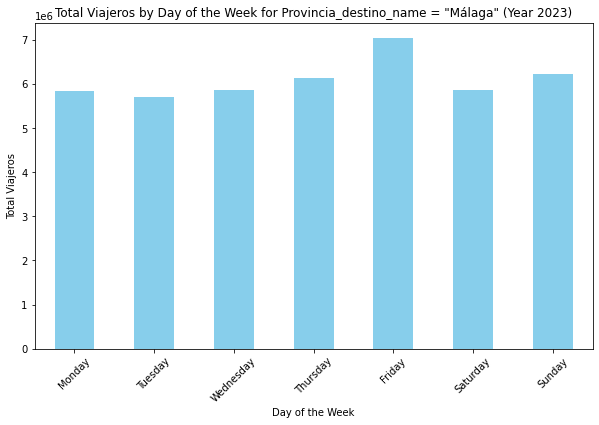

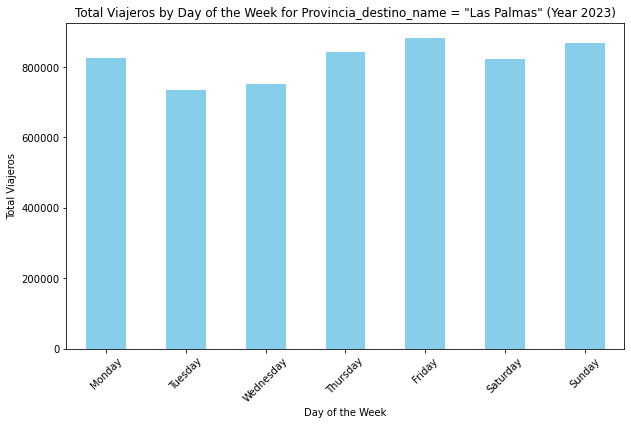

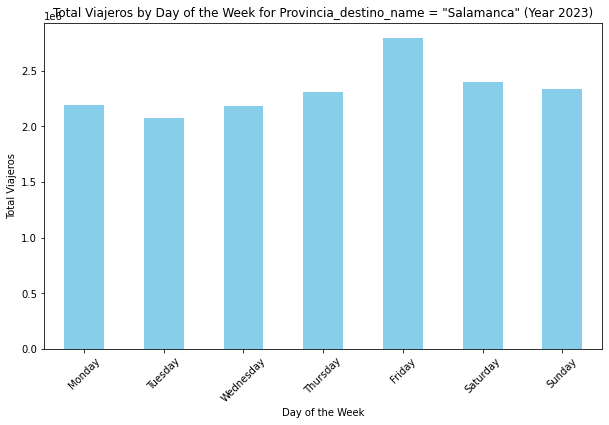

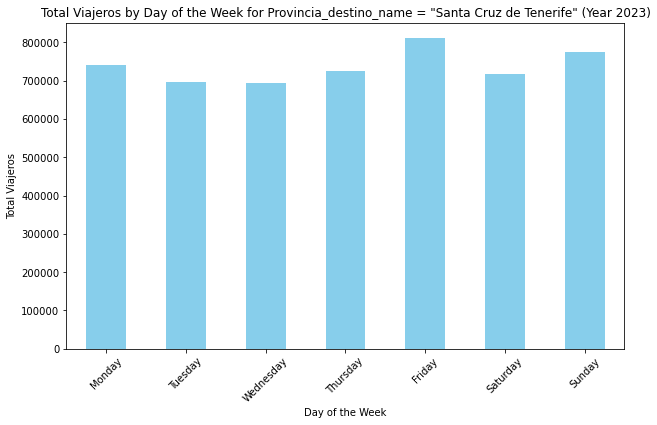

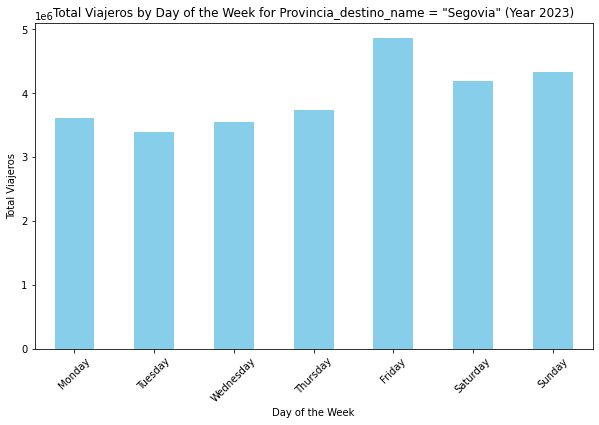

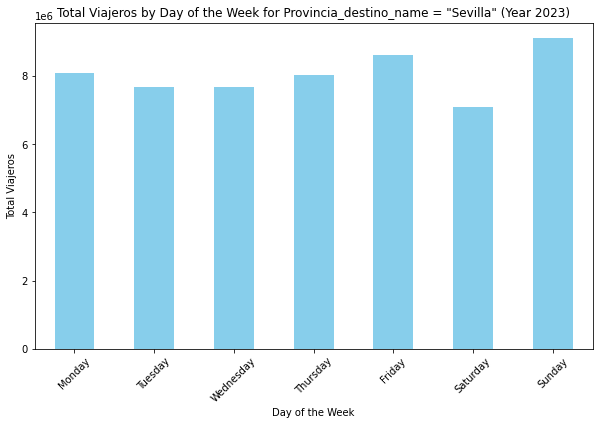

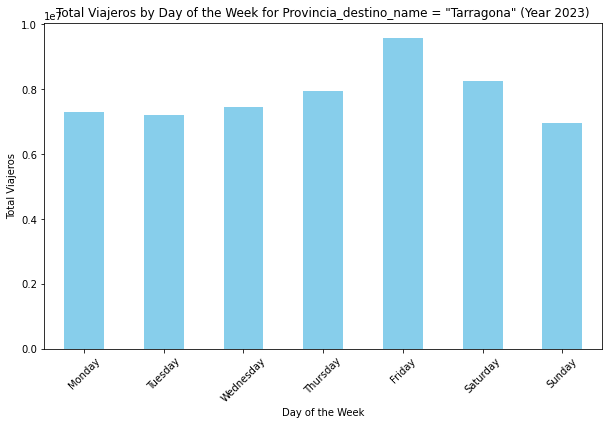

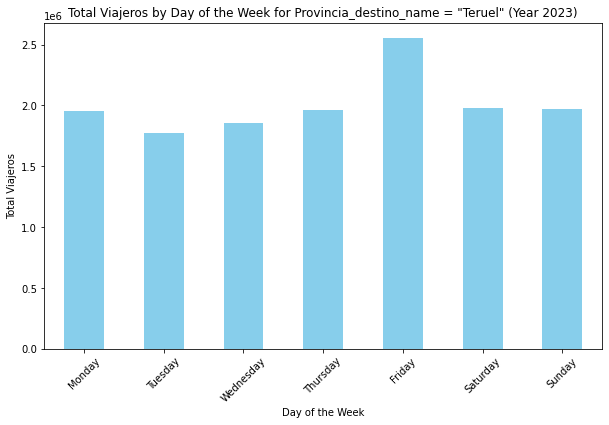

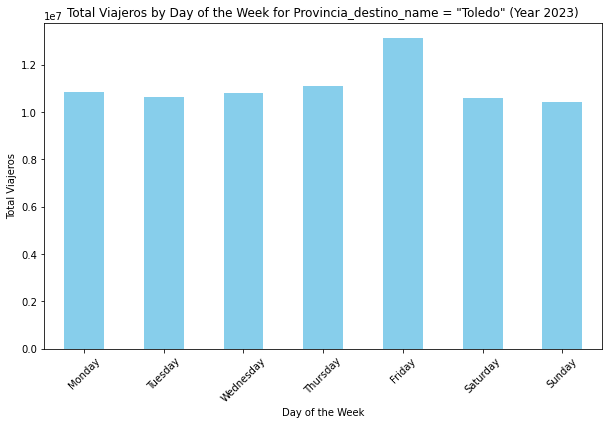

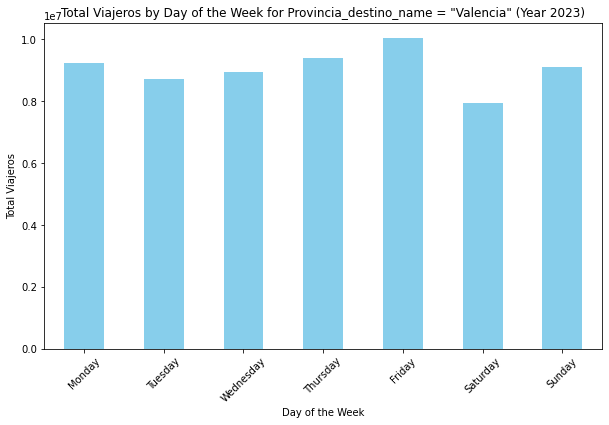

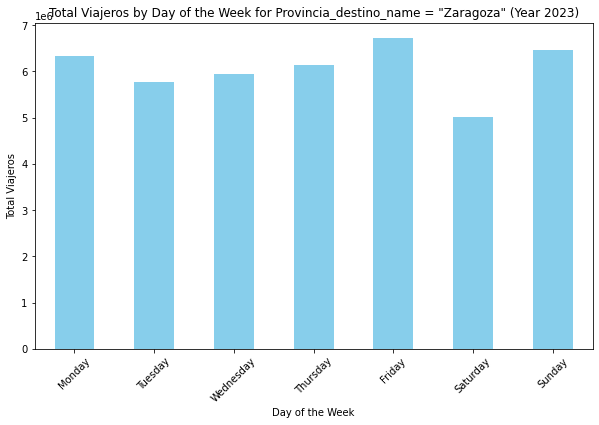

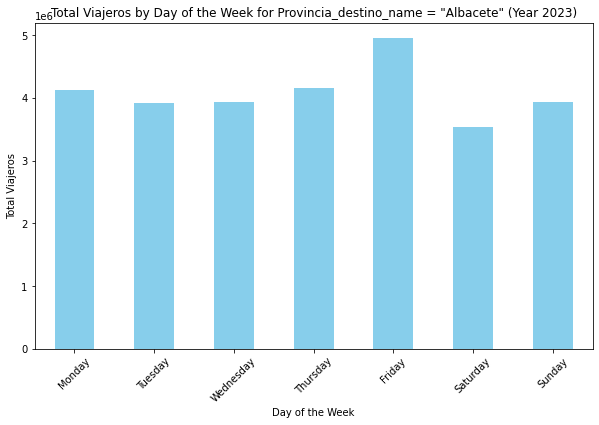

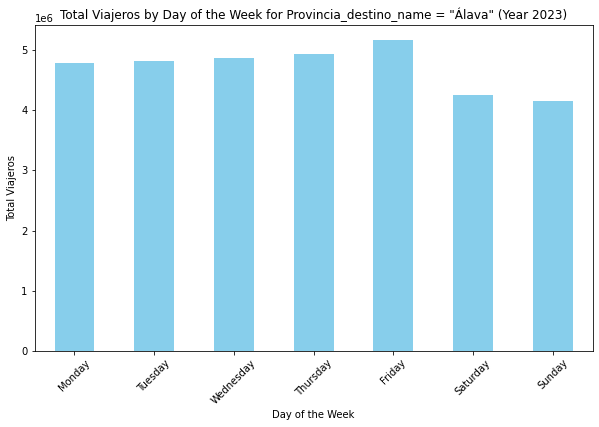

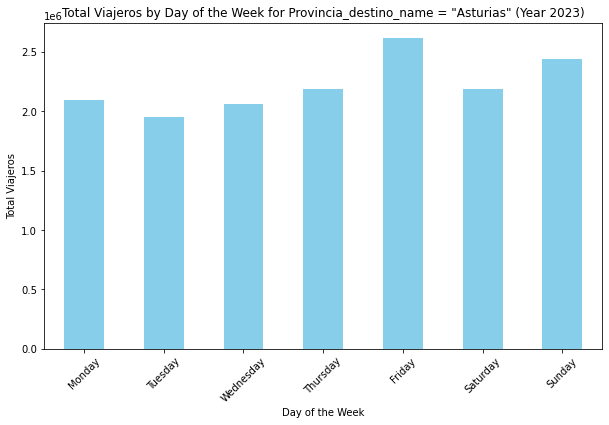

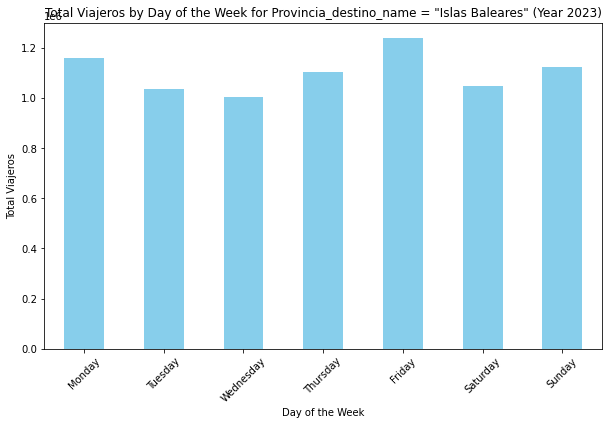

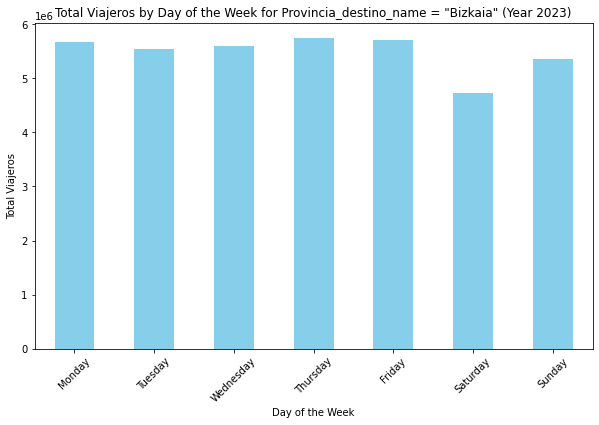

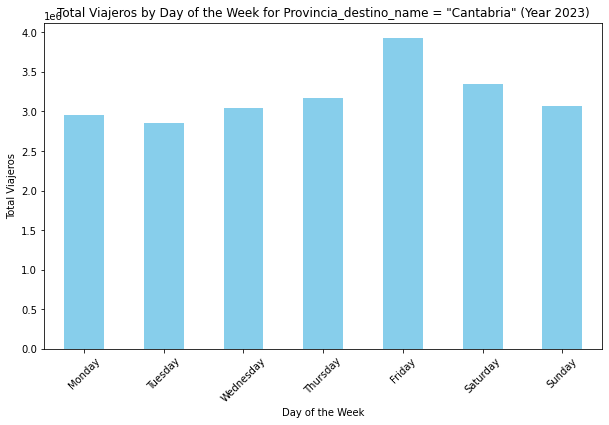

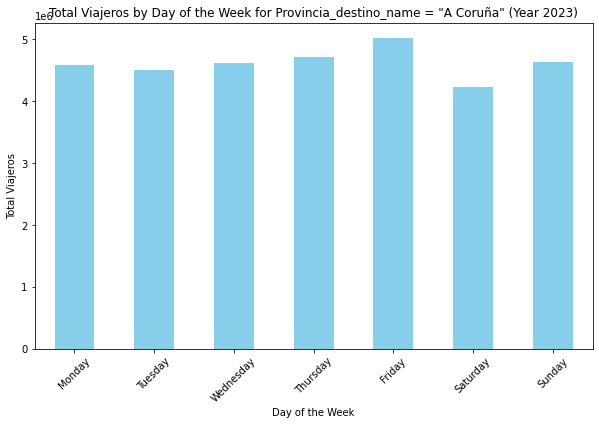

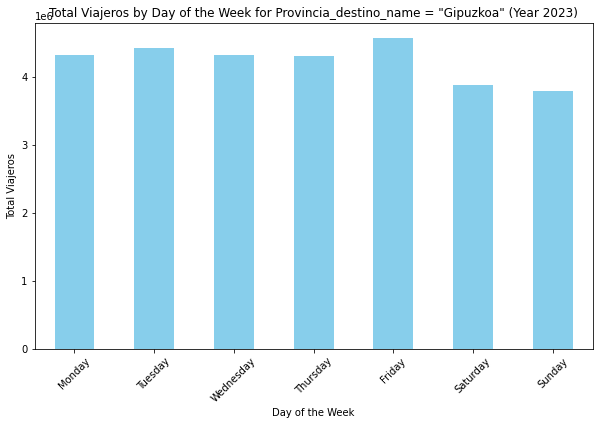

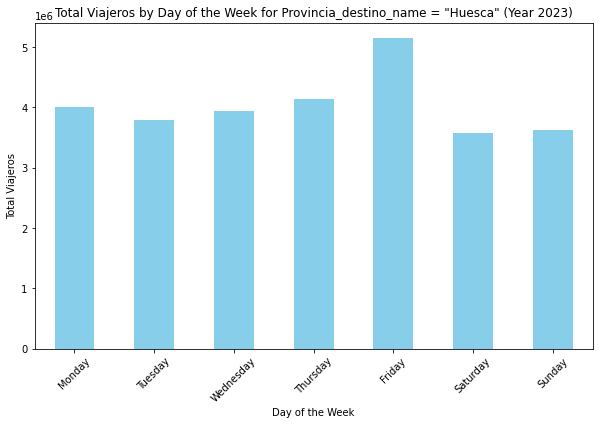

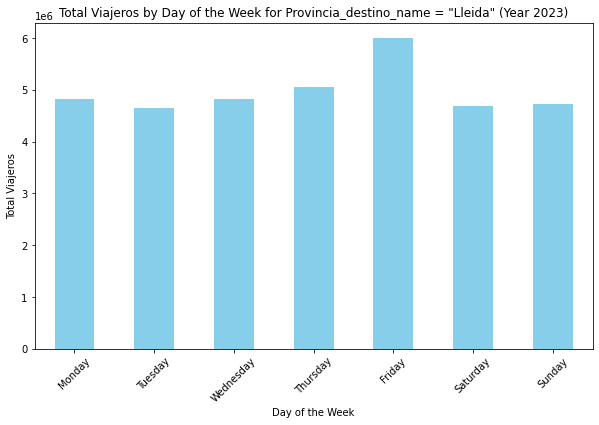

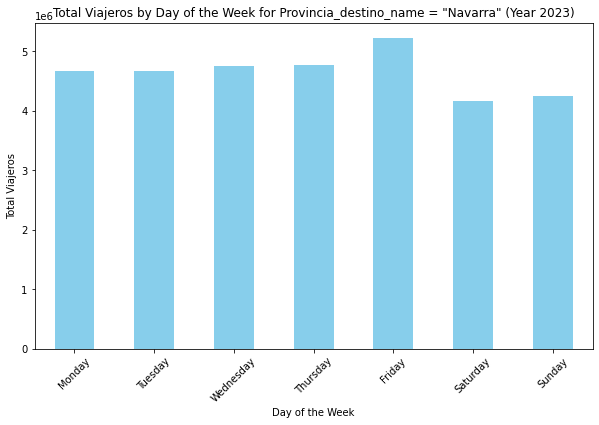

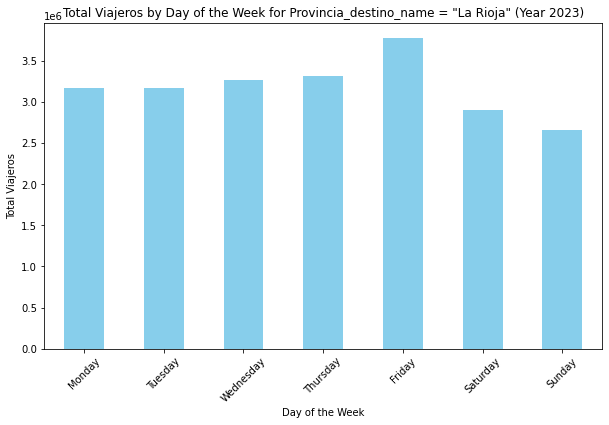

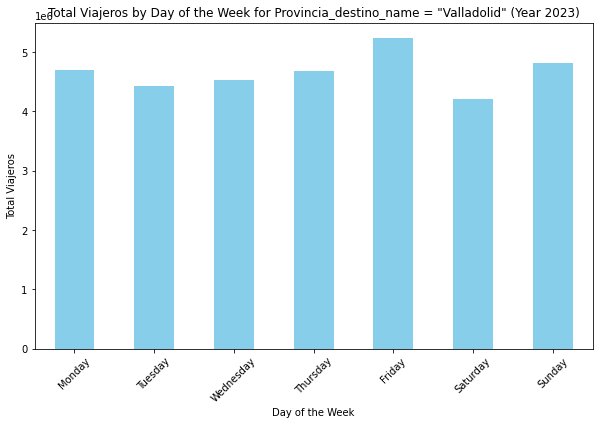

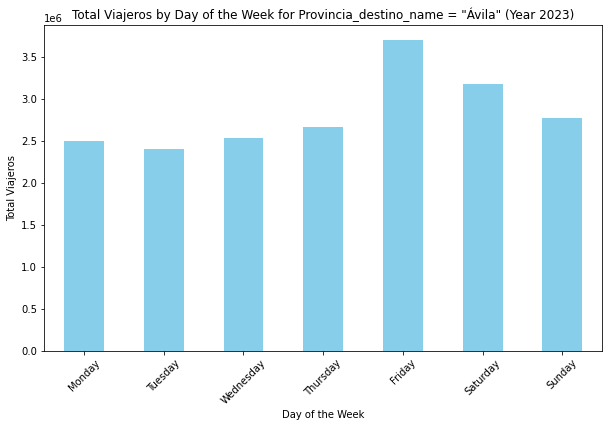

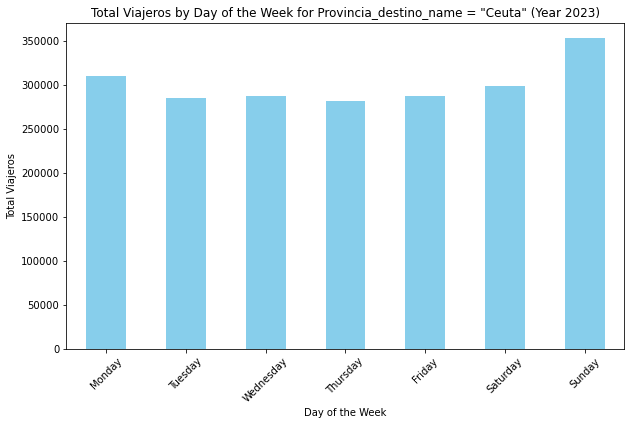

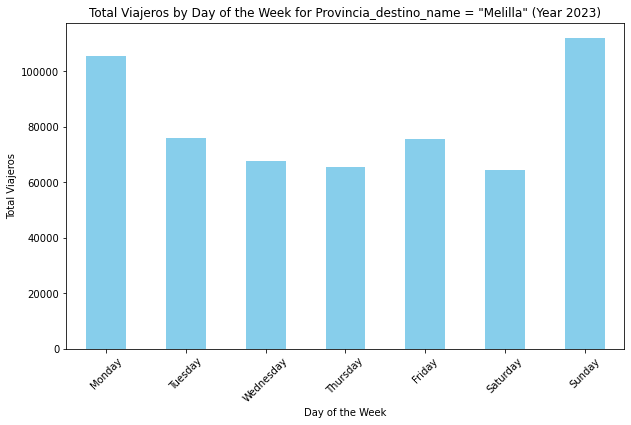

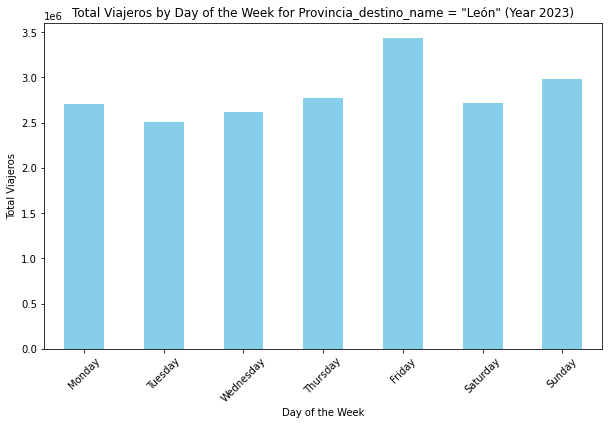

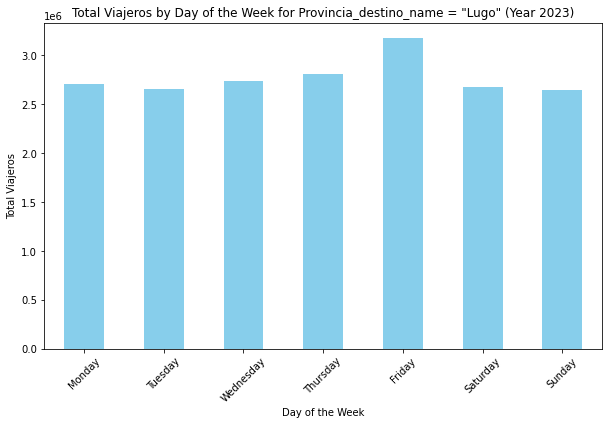

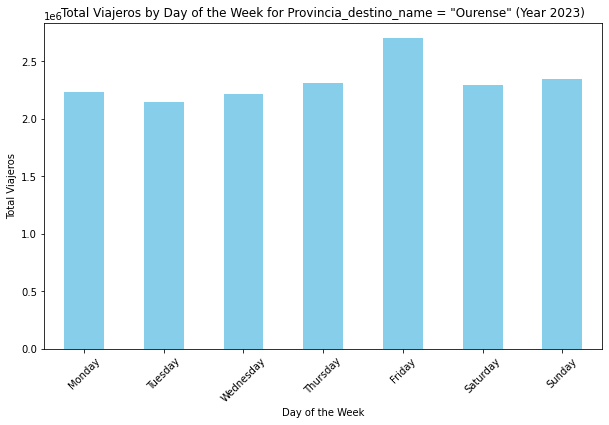

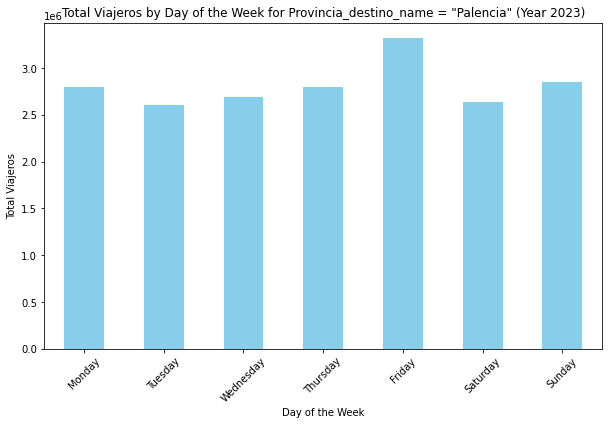

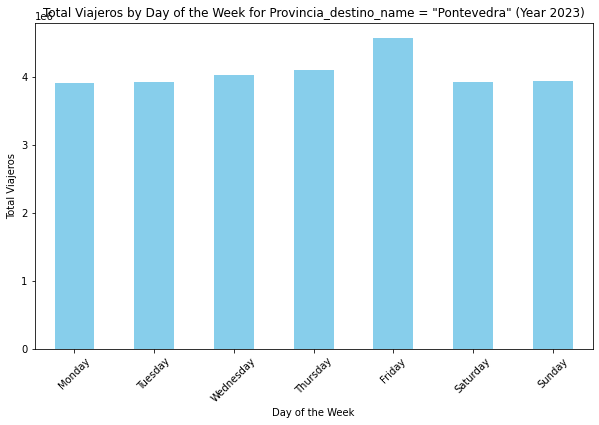

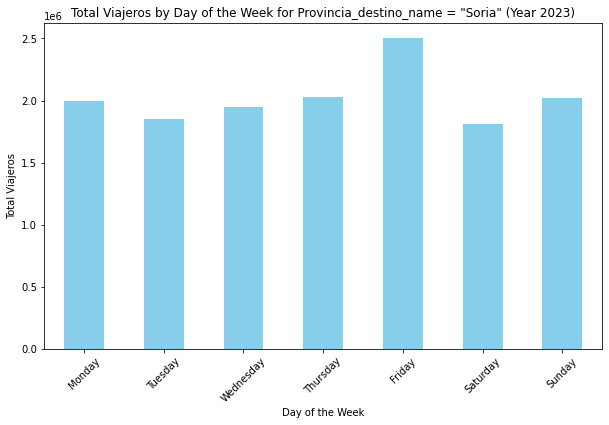

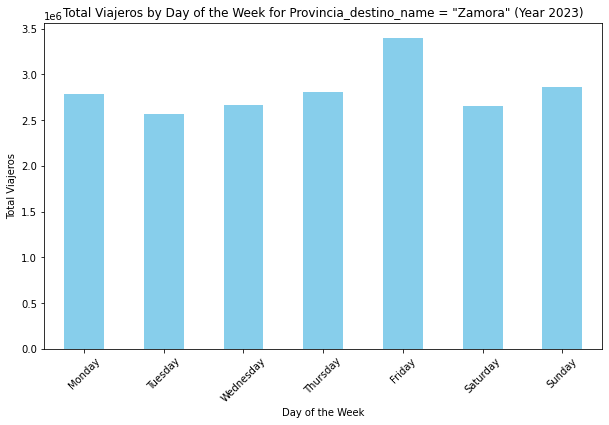

In [18]:
#CON DESTINO EN ESTAS PROVINCIAS

# Filter the DataFrame for entries from the year 2023
df_2023 = df[df['day'].dt.year == 2023]

# Get unique provinces from 'provincia_destino_name'
unique_provinces = df_2023['provincia_destino_name'].unique()

# Loop through each province and create a histogram for the year 2023
for province in unique_provinces:
    # Filter for the current province within the 2023 dataset
    filtered_df = df_2023[df_2023['provincia_destino_name'] == province]
    
    # Group by day of the week and calculate the sum of 'viajeros' for each day
    day_of_week_totals = filtered_df.groupby(filtered_df['day'].dt.day_name())['viajeros'].sum()
    
    # Sort days of the week for consistent ordering
    day_of_week_totals = day_of_week_totals.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    day_of_week_totals.plot(kind='bar', color='skyblue')
    plt.xlabel('Day of the Week')
    plt.ylabel('Total Viajeros')
    plt.title(f'Total Viajeros by Day of the Week for Provincia_destino_name = "{province}" (Year 2023)')
    plt.xticks(rotation=45)
    plt.show()


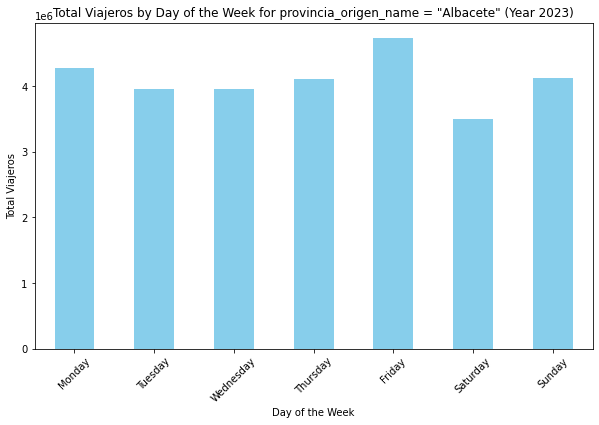

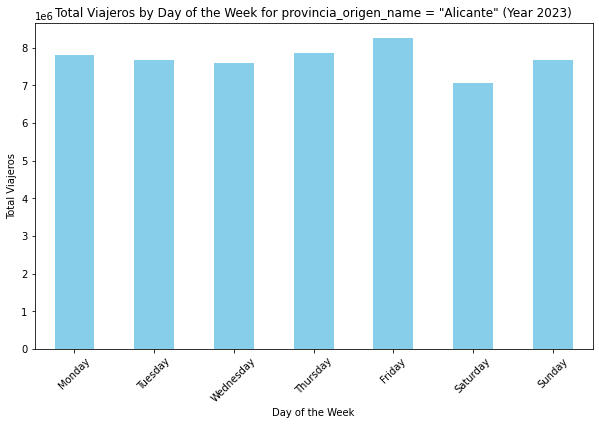

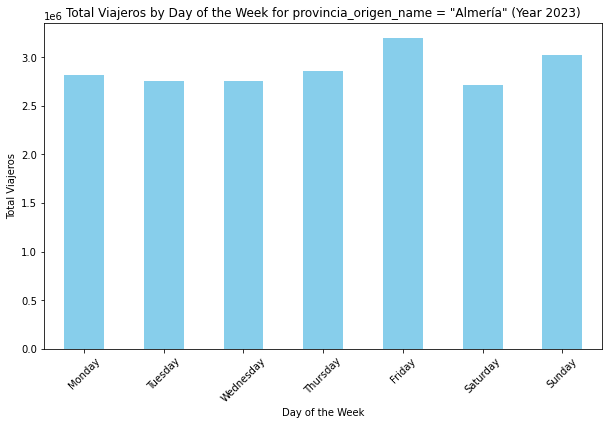

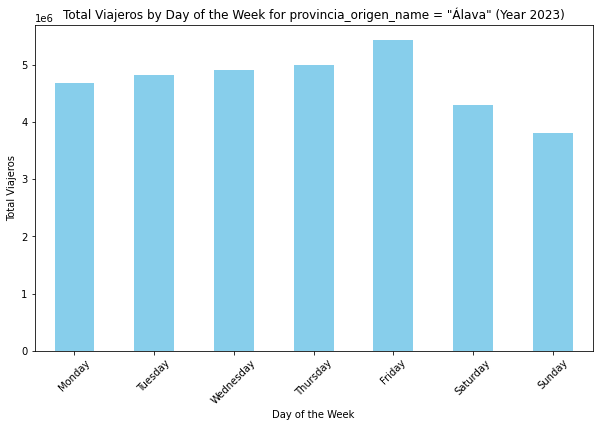

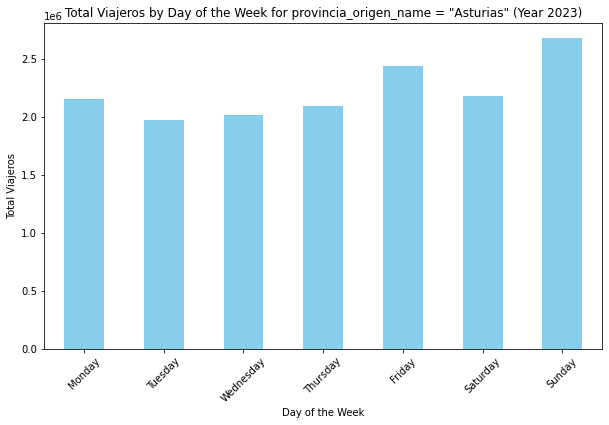

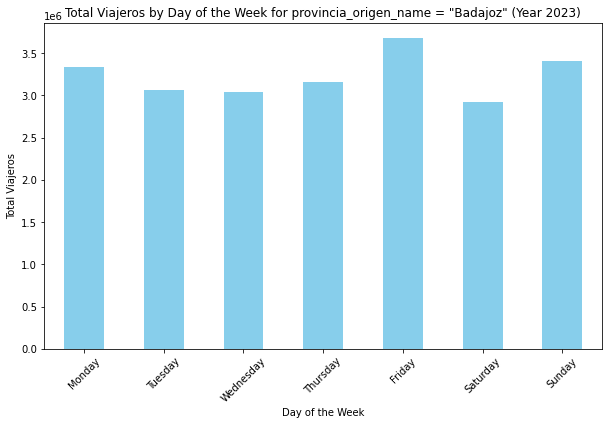

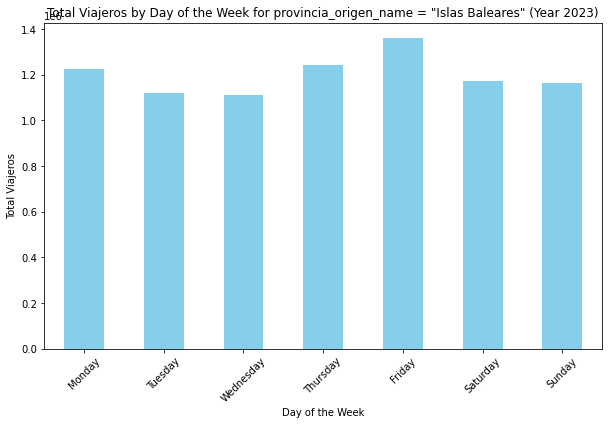

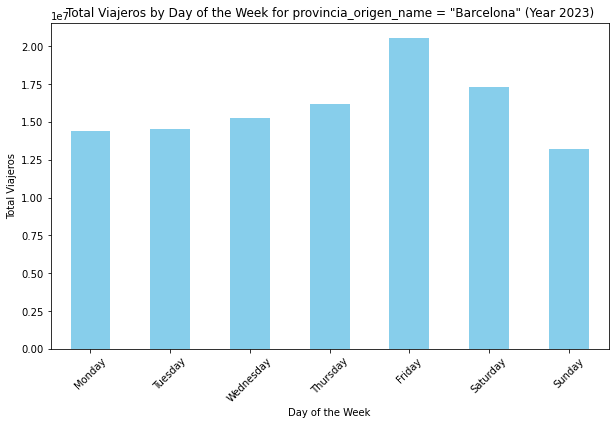

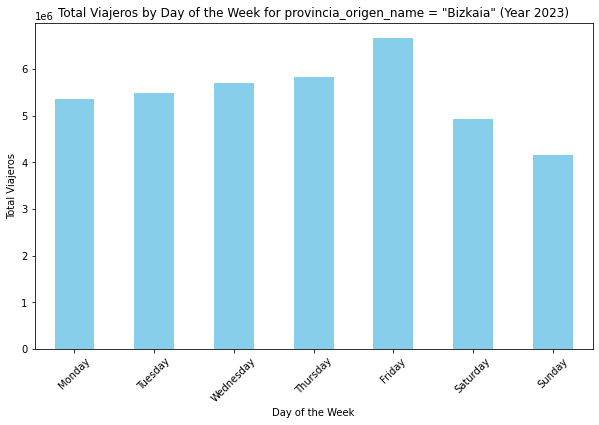

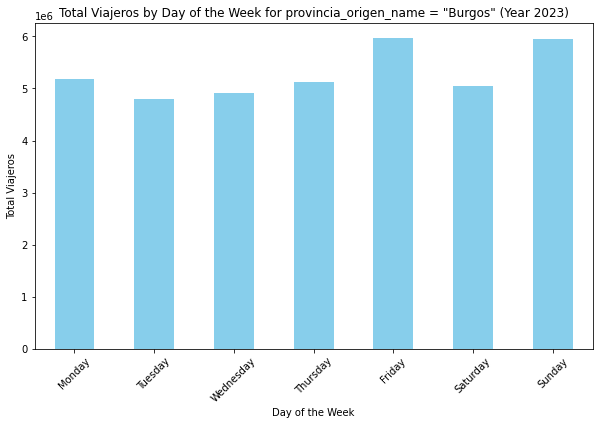

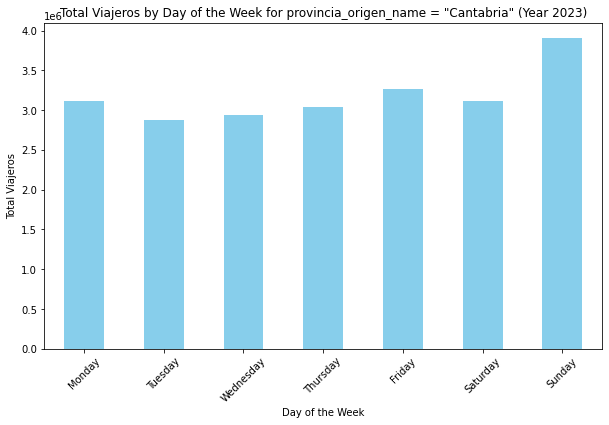

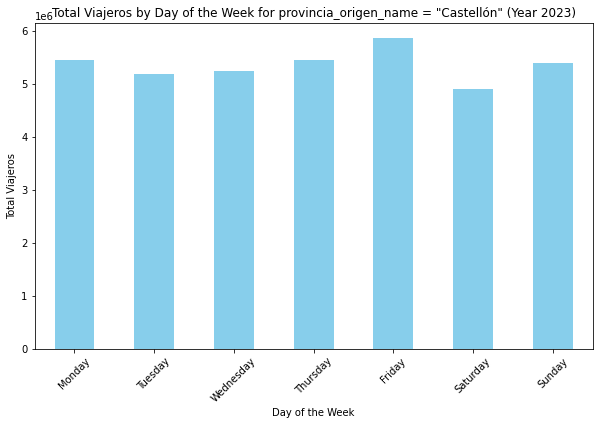

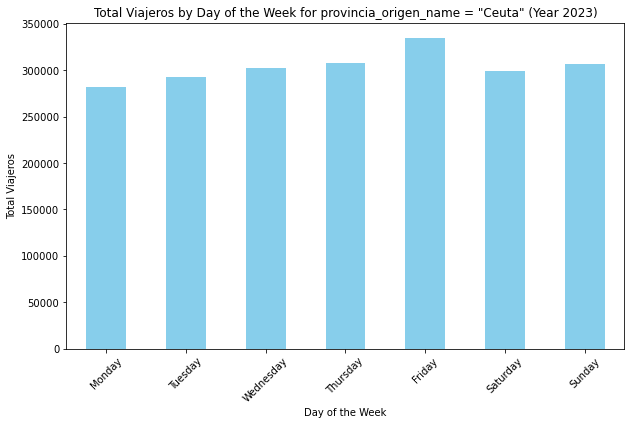

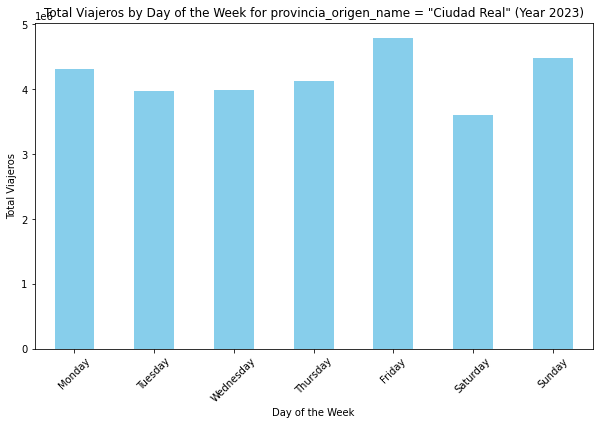

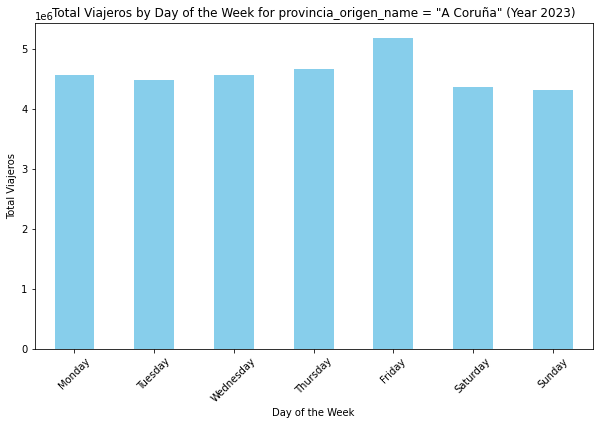

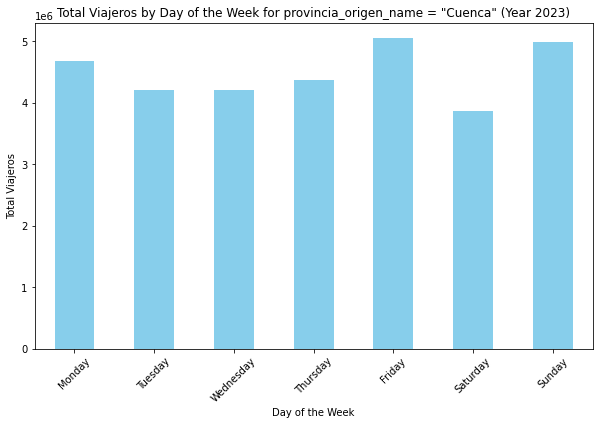

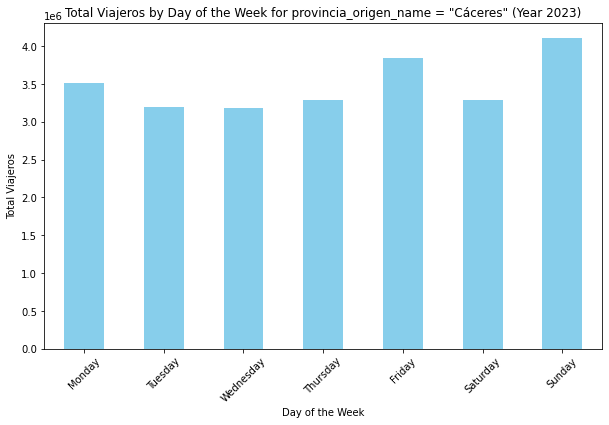

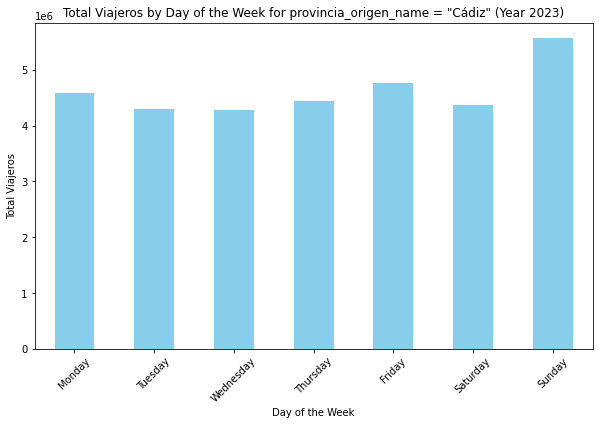

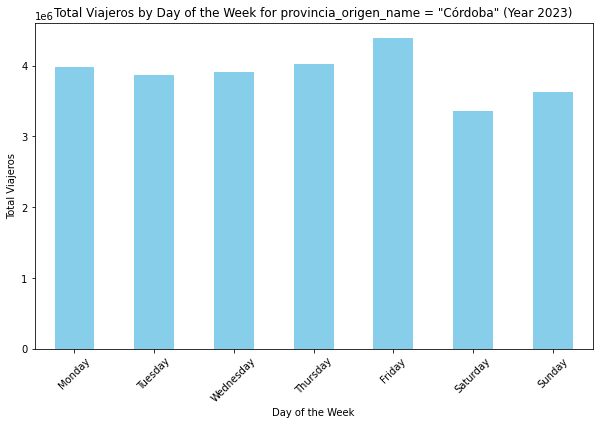

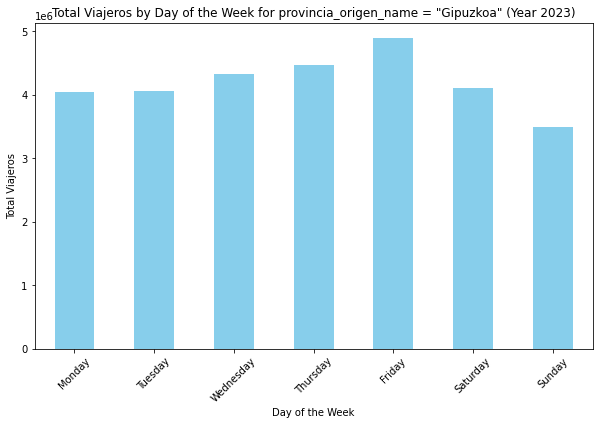

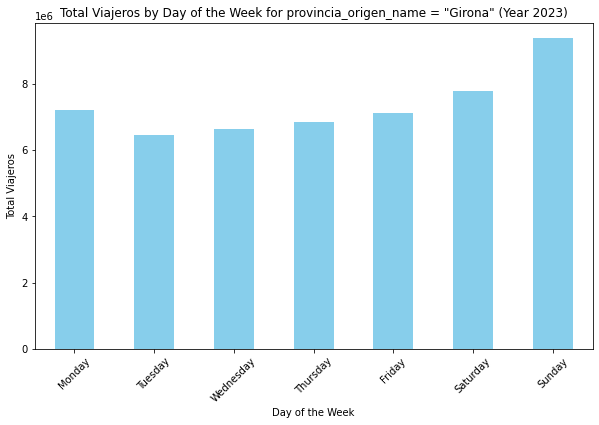

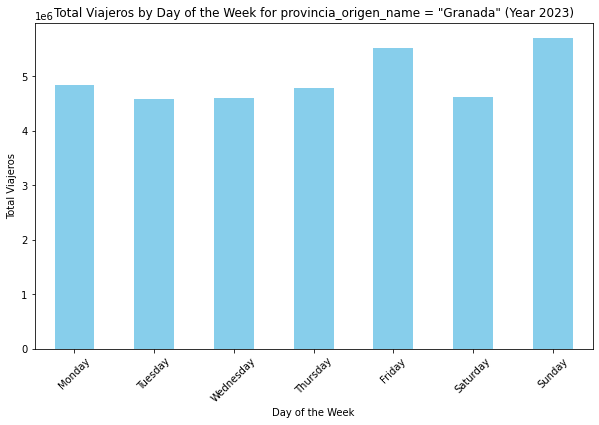

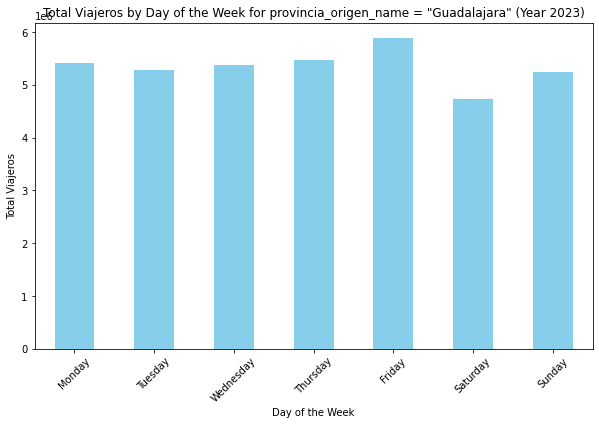

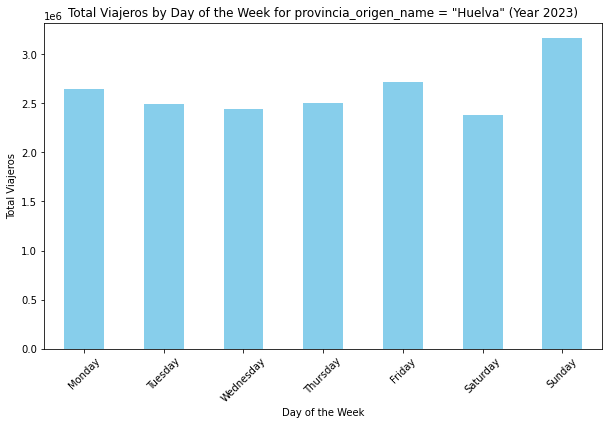

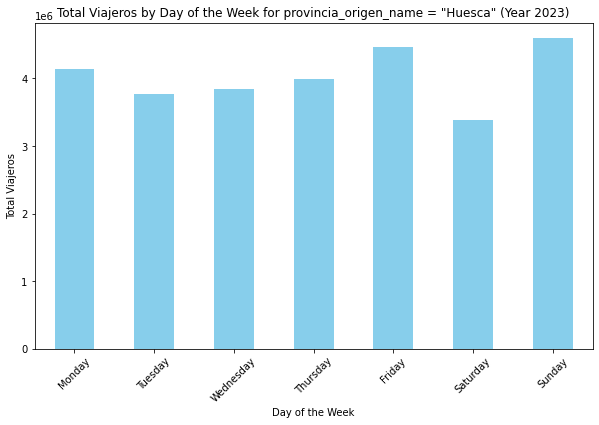

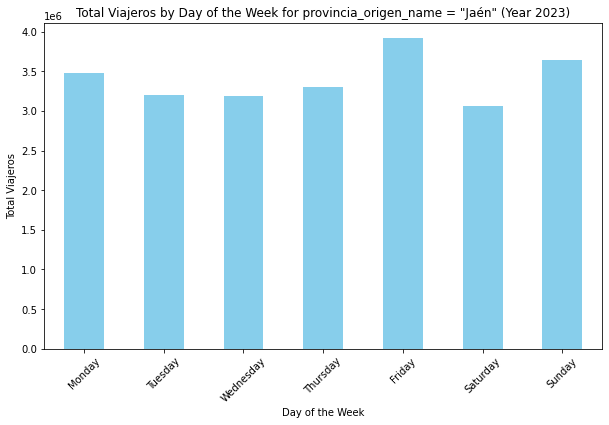

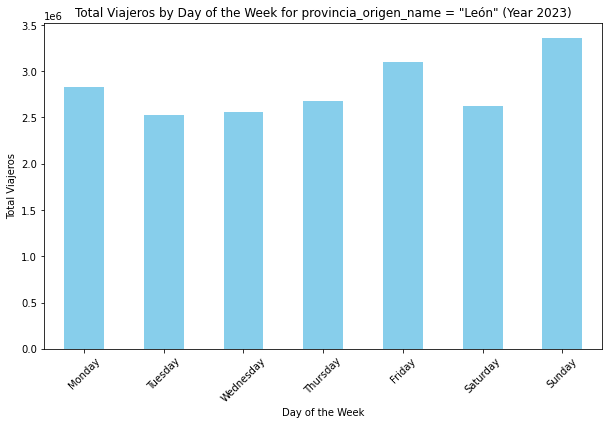

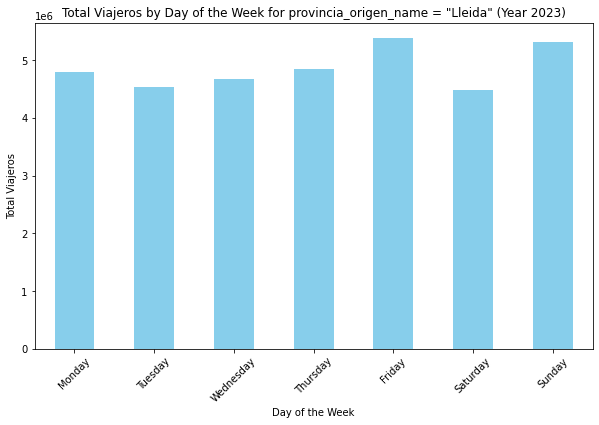

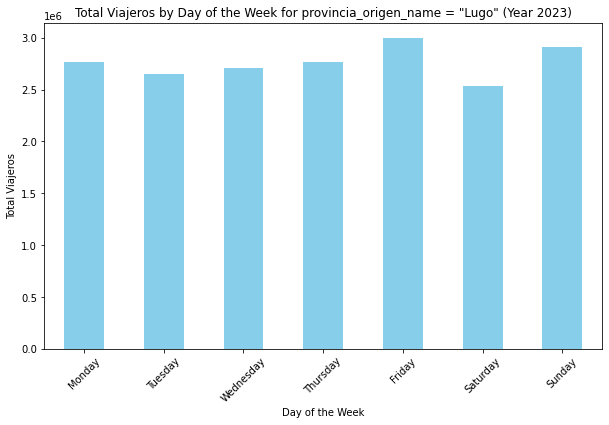

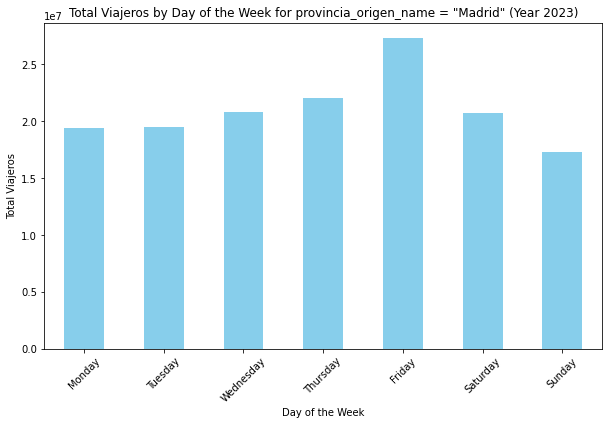

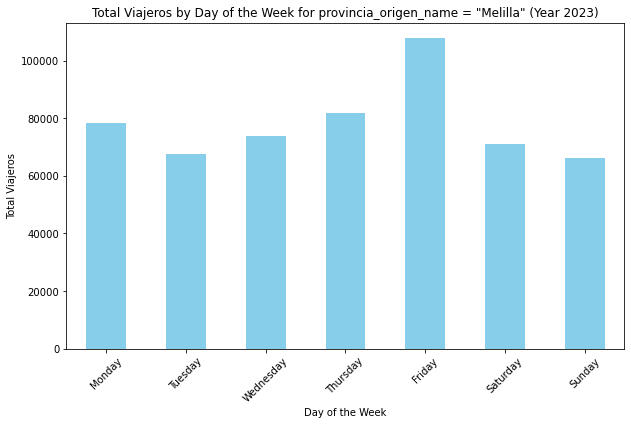

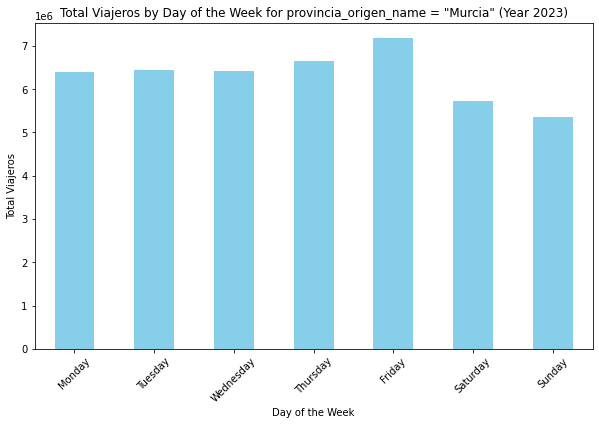

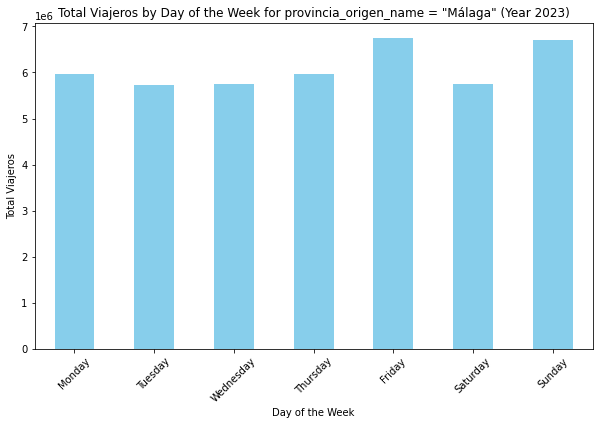

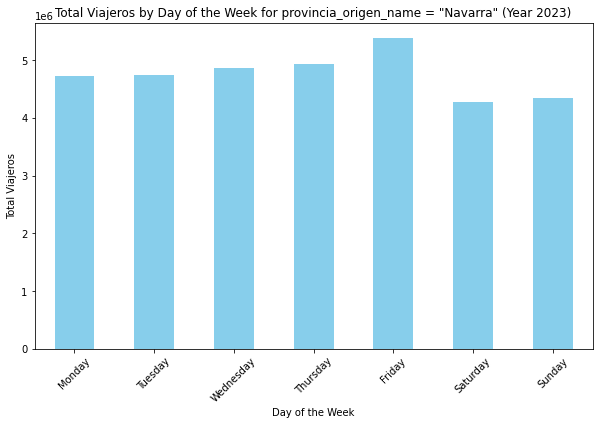

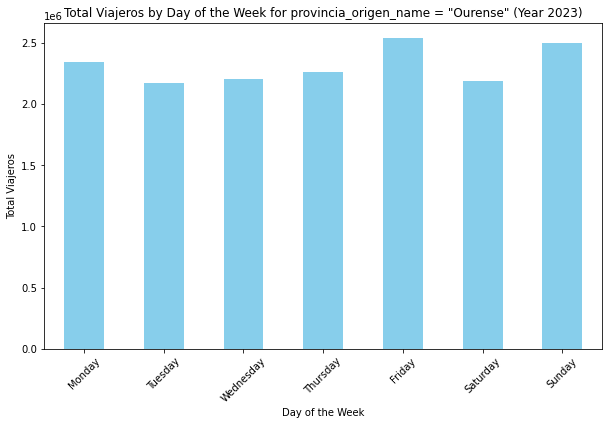

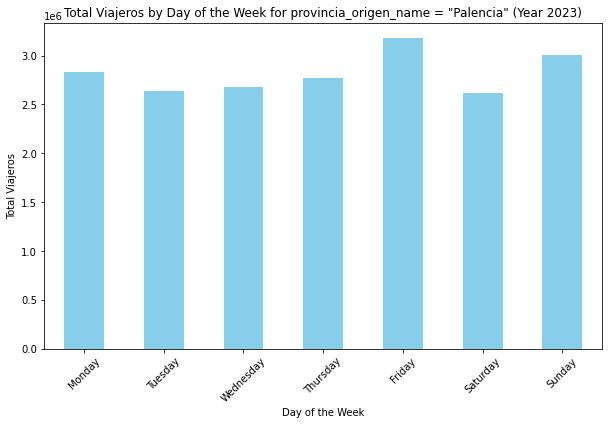

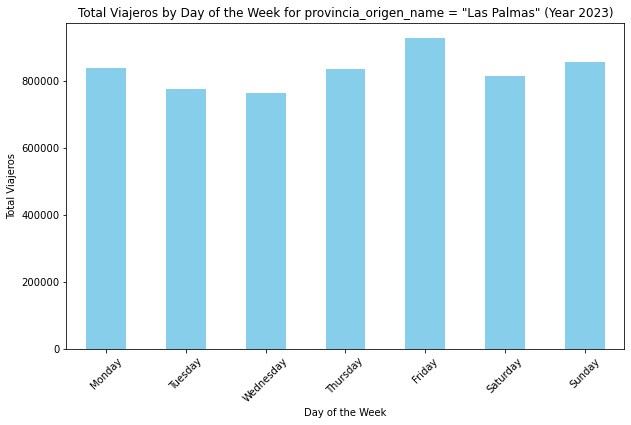

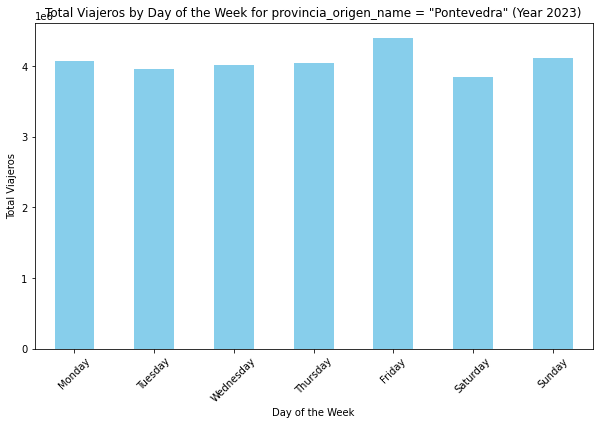

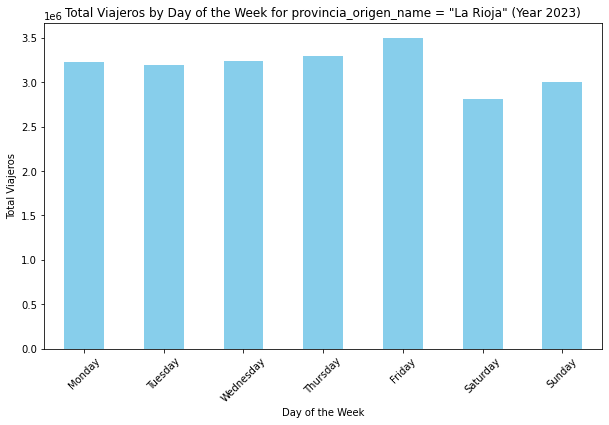

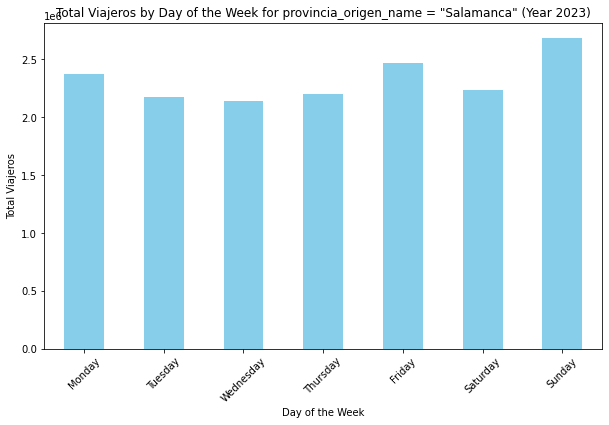

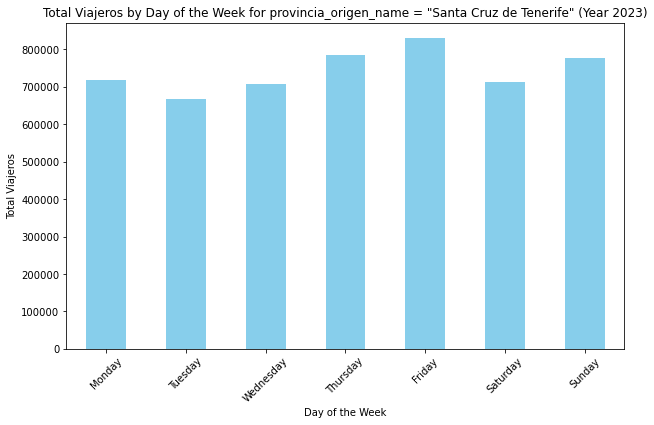

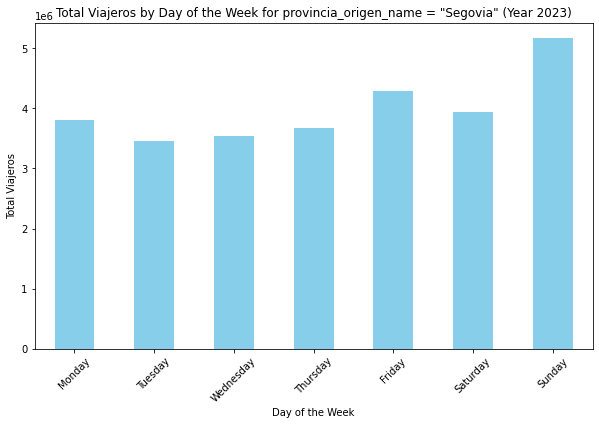

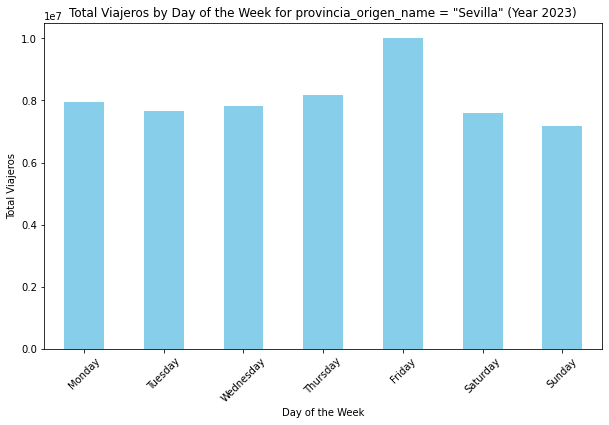

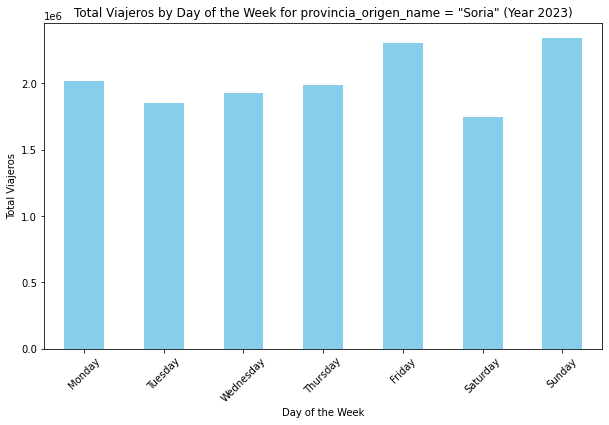

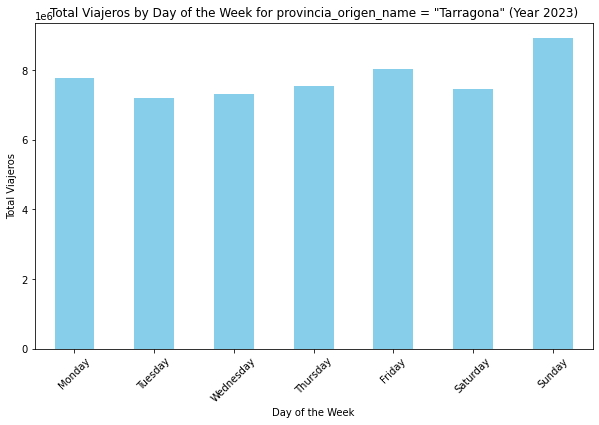

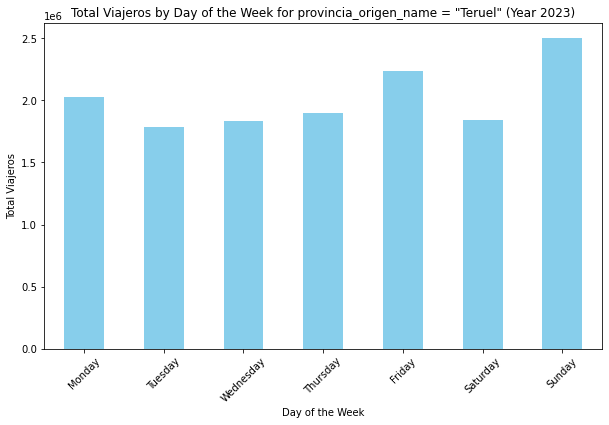

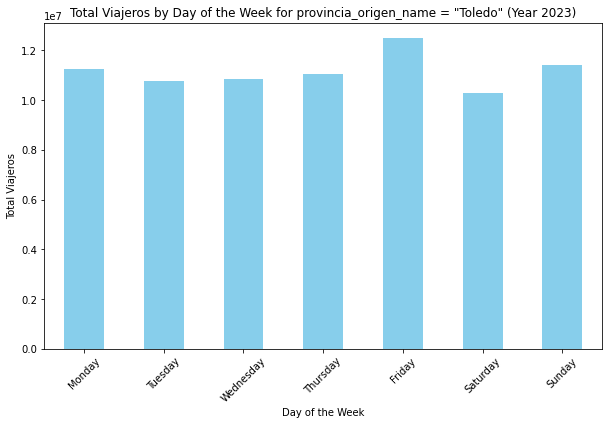

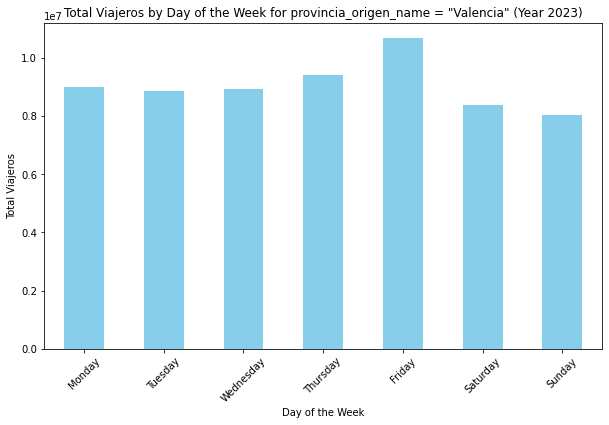

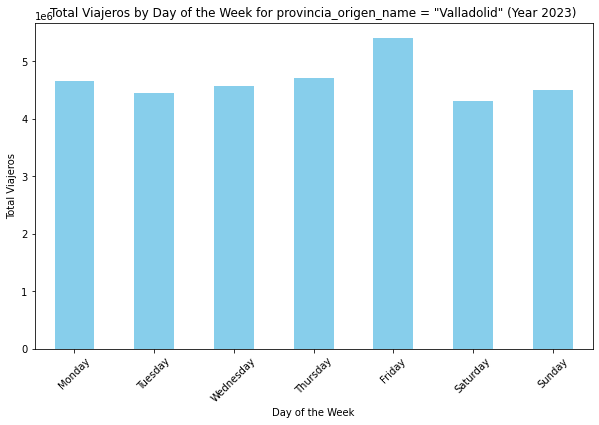

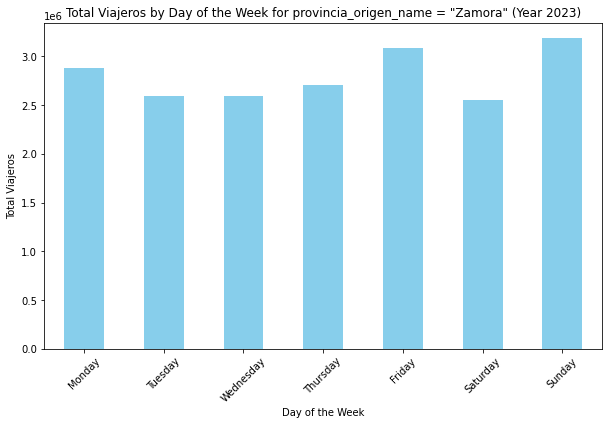

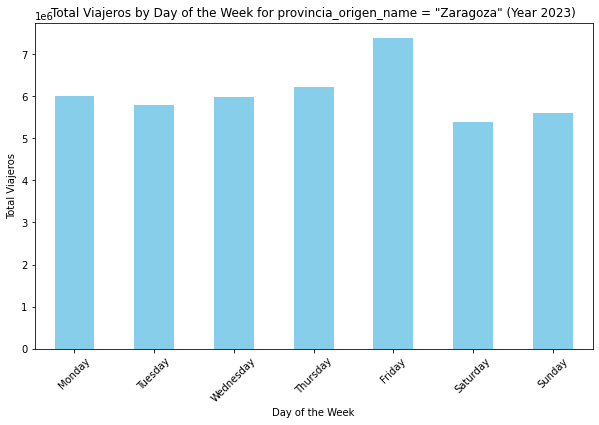

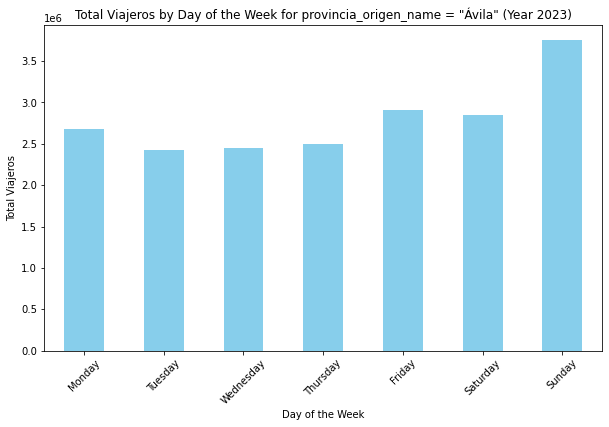

In [19]:
import matplotlib.pyplot as plt

# Filter the DataFrame for entries from the year 2023
df_2023 = df[df['day'].dt.year == 2023]

# Get unique provinces from 'provincia_destino_name'
unique_provinces = df_2023['provincia_origen_name'].unique()

# Loop through each province and create a histogram for the year 2023
for province in unique_provinces:
    # Filter for the current province within the 2023 dataset
    filtered_df = df_2023[df_2023['provincia_origen_name'] == province]
    
    # Group by day of the week and calculate the sum of 'viajeros' for each day
    day_of_week_totals = filtered_df.groupby(filtered_df['day'].dt.day_name())['viajeros'].sum()
    
    # Sort days of the week for consistent ordering
    day_of_week_totals = day_of_week_totals.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    day_of_week_totals.plot(kind='bar', color='skyblue')
    plt.xlabel('Day of the Week')
    plt.ylabel('Total Viajeros')
    plt.title(f'Total Viajeros by Day of the Week for provincia_origen_name = "{province}" (Year 2023)')
    plt.xticks(rotation=45)
    plt.show()


## TOP 3 DAYS WITH MOST TRAVELERS

In [20]:
# Find the date with the maximum 'viajeros' for each year
max_viajeros_per_year = df.loc[df.groupby('year')['viajeros'].idxmax(), ['year', 'day', 'viajeros']]

# Display the result
print(max_viajeros_per_year)


         year        day  viajeros
1235390  2022 2022-10-28    239312
657311   2023 2023-04-09    285759
306042   2024 2024-06-24    264170


## TOP 5 PROVINCES WITH MOST TOTAL TRAVELERS IN DATASET

In [21]:
# Filter for weekends (Saturday and Sunday)
weekend_days = df[df['day_of_week'].isin(['Saturday', 'Sunday'])]

# Group by 'provincia_destino_name' and sum 'viajeros'
weekend_totals = weekend_days.groupby('provincia_destino_name')['viajeros'].sum()

# Get the top 5 provinces with the most viajeros on weekends
top_5_provinces = weekend_totals.nlargest(5)

# Display the results
print(top_5_provinces)


#DESTINO

provincia_destino_name
Madrid       93170987
Barcelona    72706263
Toledo       43751893
Valencia     35333979
Sevilla      33644160
Name: viajeros, dtype: int64


In [22]:
# Filter for weekends (Saturday and Sunday)
weekend_days = df[df['day_of_week'].isin(['Saturday', 'Sunday'])]

# Group by 'provincia_destino_name' and sum 'viajeros'
weekend_totals = weekend_days.groupby('provincia_origen_name')['viajeros'].sum()

# Get the top 5 provinces with the most viajeros on weekends
top_5_provinces = weekend_totals.nlargest(5)

# Display the results
print(top_5_provinces)


#ORIGEN

provincia_origen_name
Madrid       79106571
Barcelona    63831117
Toledo       45248005
Girona       35327444
Valencia     34246652
Name: viajeros, dtype: int64


## TOP 5 PROVINCES PER DAY OF THE WEEK EXCLUDING SUMMER

In [23]:
# Filter out records for August and September
df_filtered = df[~df['month'].isin([8, 9])]

# Initialize a dictionary to store results
top_provinces_per_day = {}

# Loop through each day of the week
for day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']:
    # Filter for the current day
    daily_totals = df_filtered[df_filtered['day_of_week'] == day].groupby('provincia_destino_name')['viajeros'].sum()
    
    # Get the top 5 provinces with the most viajeros for the current day
    top_5_provinces = daily_totals.nlargest(5)
    
    # Store the results in the dictionary
    top_provinces_per_day[day] = top_5_provinces

# Display the results
for day, provinces in top_provinces_per_day.items():
    print(f"Top 5 provinces for {day} (excluding August and September):")
    print(provinces)
    print("\n")


Top 5 provinces for Monday (excluding August and September):
provincia_destino_name
Madrid       35970227
Barcelona    26413356
Toledo       18100884
Valencia     15302445
Sevilla      13275393
Name: viajeros, dtype: int64


Top 5 provinces for Tuesday (excluding August and September):
provincia_destino_name
Madrid       33780052
Barcelona    24149230
Toledo       17684995
Valencia     14521475
Sevilla      12573564
Name: viajeros, dtype: int64


Top 5 provinces for Wednesday (excluding August and September):
provincia_destino_name
Madrid       33387279
Barcelona    24461513
Toledo       18016999
Valencia     14806613
Sevilla      12651683
Name: viajeros, dtype: int64


Top 5 provinces for Thursday (excluding August and September):
provincia_destino_name
Madrid       33337381
Barcelona    24680841
Toledo       18223594
Valencia     15377010
Alicante     13192096
Name: viajeros, dtype: int64


Top 5 provinces for Friday (excluding August and September):
provincia_destino_name
Madrid    

## TOP 5 MOST COMMON TRIPS EXCLUDING THE SUMMER

In [24]:
# Now, if you want to create a trip column and include Comunidad Autónoma
#df['trip'] = df['provincia_origen_name'] + ' to ' + df['provincia_destino_name']

# Filter out records for August and September
df_filtered = df[~df['month'].isin([8, 9])]

# Initialize a dictionary to store results
top_trips_per_day = {}

# Loop through each day of the week
for day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']:
    # Filter for the current day
    daily_totals = df_filtered[df_filtered['day_of_week'] == day].groupby('trip')['viajeros'].sum()
    
    # Get the top 5 trips with the most viajeros for the current day
    top_5_trips = daily_totals.nlargest(5)
    
    # Store the results in the dictionary
    top_trips_per_day[day] = top_5_trips

# Display the results
for day, trips in top_trips_per_day.items():
    print(f"Top 5 trips for {day} (excluding August and September):")
    print(trips)
    print("\n")

Top 5 trips for Monday (excluding August and September):
trip
Toledo to Madrid          12685963
Madrid to Toledo          11619166
Girona to Barcelona       10612091
Barcelona to Girona        8904209
Tarragona to Barcelona     7569805
Name: viajeros, dtype: int64


Top 5 trips for Tuesday (excluding August and September):
trip
Toledo to Madrid          12154600
Madrid to Toledo          11945433
Girona to Barcelona        9399089
Barcelona to Girona        9268775
Tarragona to Barcelona     7068252
Name: viajeros, dtype: int64


Top 5 trips for Wednesday (excluding August and September):
trip
Madrid to Toledo          12437458
Toledo to Madrid          11923340
Girona to Barcelona        9762879
Barcelona to Girona        9658430
Barcelona to Tarragona     7265147
Name: viajeros, dtype: int64


Top 5 trips for Thursday (excluding August and September):
trip
Madrid to Toledo          12627665
Toledo to Madrid          11762985
Barcelona to Girona       10109173
Girona to Barcelona    

## TOP 5 TRIPS ON SOME FESTIVITIES

In [25]:
# Define date ranges for each holiday period
holidays = {
    "Christmas 2022": ('2022-12-23', '2023-01-08'),
    "Christmas 2023": ('2023-12-22', '2024-01-07'),
    "Semana Santa 2023": ('2023-04-02', '2023-04-09'),
    "Semana Santa 2024": ('2024-03-24', '2024-03-31')
}

# Initialize a dictionary to store the top trips for each holiday
top_trips_per_holiday = {}

# Convert "day" column to datetime format if not already done
df['day'] = pd.to_datetime(df['day'])

# Loop through each holiday and its date range
for holiday, (start_date, end_date) in holidays.items():
    # Filter for dates within the holiday period
    holiday_filter = (df['day'] >= start_date) & (df['day'] <= end_date)
    holiday_df = df[holiday_filter]
    
    # Group by 'trip' and sum the 'viajeros' for each trip during the holiday period
    holiday_totals = holiday_df.groupby('trip')['viajeros'].sum()
    
    # Get the top 5 trips with the most viajeros
    top_5_trips = holiday_totals.nlargest(5)
    
    # Store the results with the date range in the dictionary
    top_trips_per_holiday[holiday] = {
        'date_range': f"{start_date} to {end_date}",
        'top_trips': top_5_trips
    }

# Display the results
for holiday, data in top_trips_per_holiday.items():
    print(f"Top 5 trips for {holiday} ({data['date_range']}):")
    print(data['top_trips'])
    print("\n")


Top 5 trips for Christmas 2022 (2022-12-23 to 2023-01-08):
trip
Toledo to Madrid          2299456
Madrid to Toledo          2282692
Girona to Barcelona       1831366
Barcelona to Girona       1806758
Tarragona to Barcelona    1276463
Name: viajeros, dtype: int64


Top 5 trips for Christmas 2023 (2023-12-22 to 2024-01-07):
trip
Toledo to Madrid          2201328
Madrid to Toledo          2200284
Girona to Barcelona       1791625
Barcelona to Girona       1737554
Barcelona to Tarragona    1213037
Name: viajeros, dtype: int64


Top 5 trips for Semana Santa 2023 (2023-04-02 to 2023-04-09):
trip
Barcelona to Girona       1238697
Toledo to Madrid          1224280
Girona to Barcelona       1220031
Madrid to Toledo          1165479
Barcelona to Tarragona     900857
Name: viajeros, dtype: int64


Top 5 trips for Semana Santa 2024 (2024-03-24 to 2024-03-31):
trip
Barcelona to Girona       1198098
Girona to Barcelona       1196867
Toledo to Madrid          1117101
Madrid to Toledo          1046687